<div style="display: flex; align-items: center;">
    <img src="static/logo.png" width="120" height="120">
    <h1>Spotify Web API Tutorial</h1>
</div>

<p>
    The Spotify Web API allows the creation of applications that can interact with Spotify's streaming service, such as retrieving metadata about content, getting recommendations, creating and managing playlists, or controlling playback.
</p>

<h2>Table of Contents</h2>
<ol>
    <li><a href="#preamble">Preamble</a></li>
    <li><a href="#introduction">Introduction</a></li>
    <li><a href="#profile-and-application">Profile and Application</a></li>
    <li><a href="#api-access">API Access</a></li>
    <li><a href="#using-restful-apis">Using RESTful APIs</a></li>
    <li><a href="#spotify-python-api">Spotify Python API</a></li>
    <li><a href="#data-extraction-and-analysis">Data Extraction and Analysis</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ol>

<section id="preamble">
    <h2>1. Preamble</h2>
    <h3>Creating a Virtual Environment</h3>
</section>

<p>
    Before you begin, it's advisable to create a virtual environment for your project.
    You can do this using either `virtualenv` or `conda`, depending on your preference. Here is an example using `conda`:
</p>

<ul>
    <li>Ensure you have `conda` installed. If not, you can install Miniconda or Anaconda from their respective websites.</li>
    <li>Open your terminal and create a new conda environment by running the following command:</li>
</ul>

<code>conda create --name myenv python=3.9</code>

<ul>
    <li>Activate the environment:</li>
</ul>

<code>conda activate myenv</code>

<ul>
    <li>Deactivate the environment:</li>
</ul>

<code>conda deactivate</code>

<p>Replace <span style="font-style: italic; font-size: 15px;"><i>"myenv"</i></span> with the name you want to give your virtual environment.</p>

<div style="display: flex; align-items: center;">
    <img src="static/Screen/Screen_1.png" width="900" height="600">
</div>

<section id="introduction">
    <h2>2. Introduction</h2>
</section>

<div style="display: flex; align-items: center;">
    <h3>Before we start... what is Spotify!? </h3>
    <img src="static/emoji.png" width="80" height="80">
</div>  
Spotify is a <strong>music streaming</strong> platform that offers users a vast catalog of music tracks, podcasts, and more. Founded in 2006 in Sweden, Spotify has quickly gained popularity worldwide as one of the leading music streaming services.

Key features of Spotify:
- <strong>Music Streaming:</strong> Users can access millions of tracks from artists around the world. The music library is extensive and covers a wide range of genres and styles.

- <strong>Personalized Playlists:</strong> Spotify offers advanced recommendation features that create personalized playlists based on users' musical tastes. These playlists include "Discover Weekly" and "Release Radar."

- <strong>Podcasts:</strong> In addition to music, Spotify hosts a wide range of podcasts on topics ranging from popular culture to science, from politics to technology.

- <strong>Offline Mode:</strong> Users can download tracks and podcasts for offline listening, ideal for those who want to enjoy music without an internet connection.

- <strong>Social Sharing:</strong> Spotify allows users to share their playlists, favorite tracks, and musical activities on social media platforms, enabling easy and interactive sharing.

- <strong>Device Versatility:</strong> Spotify is accessible on a wide range of devices, including computers, smartphones, tablets, smart TVs, gaming consoles, and other streaming devices.

#### General Overview of What Spotify APIs Are:

The <i><strong>Spotify APIs</strong></i> are tools that allow developers to interact with Spotify's music platform and access various functionalities.<br>
These APIs provide a set of <strong>endpoints and methods</strong> that enable developers to retrieve information about tracks, artists, playlists, and much more. Essentially, they represent a bridge connecting the capabilities of the Spotify platform with developers' creative ideas.

#### Importance of APIs for Creating Music Apps:<br>
The <i><strong>Spotify APIs</strong></i> are essential for creating music apps as they provide developers with access to a vast music catalog without having to build everything from scratch. This not only simplifies the development process but also allows developers to focus on creativity and innovation rather than managing complex music databases. APIs also enable integration of features such as track playback, personalized playlist creation, and more, enhancing the end-user experience.

#### Preview of Upcoming Steps:<br>
In the upcoming stages of the tutorial, we will explore in detail the various steps necessary to create your music app using the Spotify APIs. We will start with an introduction that lays the foundation, then move on to creating a developer profile and registering your application. Next, we will address the crucial process of accessing the APIs and learn how to use <strong>RESTful calls</strong> to obtain music information.<br>
At the heart of the tutorial, we will dive into the practical use of Spotify APIs with Python, opening up a world of creative possibilities.<br>
We will continue by exploring data extraction and analysis, and finally conclude our journey with a summary of the skills acquired and inspiration for future explorations.


<section id="profile-and-application">
    <h2>3. Profile and Application</h2>
</section>

The following steps will guide you through creating music apps using the API:
<div class="container">
    <p>Create an app and select "Web API" when it asks which APIs you intend to use.</p>
    <a href="https://developer.spotify.com/documentation/web-api" target="_blank">
        <button style="background-color: #1DB954; color: #fff; padding: 10px 15px; border: none; border-radius: 5px; cursor: pointer;">
            Spotify Developer Dashboard
        </button>
    </a>
</div>

<div style="display: flex; align-items: center;">
    <img src="static/Screen/Screen_2.png">
</div>

- Once the application has been created, it will be available in the Dashboard

<div style="display: flex; align-items: center;">
    <img src="static/Screen/Screen_3.png">
</div>

- Once your app is created, you will have access to the app's credentials. These will be required for API authorisation to obtain an access token .

<div style="display: flex; align-items: center;">
    <img src="static/Screen/Screen_4.png">
</div>

- Nella pagina delle impostazioni dell'app, aggiungi una <strong>Redirect URI</strong>. Questo è l'URL a cui Spotify reindirizzerà l'utente dopo l'autenticazione. <br>
Puoi utilizzare http://localhost:5000/callback per scopi di sviluppo.

<div style="display: flex; align-items: center;">
    <img src="static/Screen/Screen_5.png" width="1200" height="600">
</div>

<section id="api-access">
    <h2>4. API Access</h2>
</section>

Spotify APIs are <strong>RESTful APIs</strong>. They follow the REST architectural style, which is based on the concept of resources identified by URIs and manipulated through standard HTTP methods such as GET, POST, PUT, DELETE, etc.

The process for obtaining an access token from Spotify involves making a POST request to the endpoint https://accounts.spotify.com/api/token.

In the case of Spotify's REST APIs, the request we discussed earlier to obtain the access token uses the POST method to send data to Spotify's authorization server. Authentication parameters (client ID and client secret) are included in the request header, while specific details of the request, such as the grant type, are included in the request body.

### OAuth 2.0 Authorization Flow:

- **Client Registration:**<br>The client registers with the Authorization Server, obtaining a client ID and a client secret.

- **User Redirection:**<br>The client redirects the user to the Authorization Server for authentication. In this step, the client can specify the type of access requested (e.g., read or write).

- **Authorization Grant:**<br>The user grants authorization to the application.

- **Receiving the Authorization Code:**<br>The Authorization Server redirects the user back to the client with an authorization code.

- **Exchanging the Code for an Access Token:**<br>The client sends the authorization code to the Authorization Server to obtain the Access Token.

- **Using the Access Token:**<br>The client uses the Access Token to access protected resources at the Resource Server.

- **HTTP Request for the Access Token:**<br>A POST request to the Authorization Server's endpoint is involved in the token exchange phase to obtain the Access Token.


<div style="display: flex; align-items: center;">
    <img src="static/Screen/Screen_6.png">
</div>

<p>Let's write a <strong>Python</strong> function that can be used to obtain a valid access token, which will then be used to <strong>authenticate requests to Spotify's APIs</strong>.</p>

In [1]:
import requests
import base64

def get_spotify_access_token(client_id, client_secret):
    url = 'https://accounts.spotify.com/api/token'
    headers = {
        'Authorization': 'Basic ' + base64.b64encode(f'{client_id}:{client_secret}'.encode()).decode()
    }
    data = {
        'grant_type': 'client_credentials'
    }
    
    try:
        response = requests.post(url, headers=headers, data=data)
        response.raise_for_status()  # Raises an exception for HTTP request errors
        token_data = response.json()
        
        if 'access_token' in token_data:
            return token_data['access_token']
        else:
            raise Exception(f"Error obtaining access token: {token_data.get('error', 'Unknown error')}")
            
    except requests.exceptions.RequestException as e:
        raise Exception(f"HTTP request error: {e}")

In [ ]:
from dotenv import load_dotenv
import os

load_dotenv()

client_id = os.getenv('CLIENT_ID')
client_secret = os.getenv('CLIENT_SECRET')

print(f"Client ID: {client_id}")
print(f"Client secret: {client_secret}")

access_token = get_spotify_access_token(client_id, client_secret) # obtain the access token
print(f"Access token: {access_token}")

Now let's verify that the access token was obtained correctly.

<section id="using-restful-apis">
    <h2>5. Using RESTful APIs</h2>
</section>

Once you have acquired the access token, you are ready to authenticate and authorize requests to the APIs. Probably the first thing you might want to do with such an API is to search for a specific artist on Spotify to obtain all their information:

- Name
- ID
- Genre
- Popularity
- Followers
- Spotify URL
- Profile image

In [3]:
import requests

def search_artist(token, artist_name):
    url = "https://api.spotify.com/v1/search"
    headers = {
        "Authorization": f"Bearer {token}"
    }
    params = {
        "q": artist_name,
        "type": "artist",
        "limit": 1
    }
    
    try:
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()  # Raises an exception for HTTP request errors
        data = response.json()
        artists = data.get("artists", {}).get("items", [])
        
        if artists:
            return artists[0]
        else:
            print(f"No artist found with the name '{artist_name}'.")
            return None
            
    except requests.exceptions.RequestException as e:
        print(f"HTTP request error: {e}")
        return None

<p>It can be useful to write auxiliary functions to:</p>
<ul>
    <li>Extract the Spotify link from the entity's <strong>"external_urls"</strong> dictionary;</li>
    <li>Make it accessible via a simple click to redirect to the page specified by the URL;</li>
    <li>Display various images from their URLs;</li>
    <li>Convert the durations (in ms) of tracks to minutes;</li>
    <li>Provide a function to make URLs in the global dataframe clickable;</li>
</ul>

In [4]:
import pandas as pd
from IPython.display import Image, display, HTML
from bs4 import BeautifulSoup

# Function definitions
def extract_spotify_url(external_urls):
    return external_urls.get("spotify", None)  

def make_clickable(link):
    return f'<a href="{link}" target="_blank">{link}</a>' if link else "No URL"

def display_image(image_url):
    return f'<img src="{image_url}" alt="Cover Image" style="max-height: 80px; max-width: 80px;">' if image_url else "No Image"

def convert_duration(duration_ms):
    duration_minutes = duration_ms / 60000
    return round(duration_minutes, 2)

def extract_href(html):
    soup = BeautifulSoup(html, 'html.parser')
    return soup.find('a')['href'] if soup.find('a') else "No URL"


In [5]:
# Example artist name
artist_name = "Emis Killa" 
artist = search_artist(access_token, artist_name)  # Obtain the artist

# Prepare artist data
artist_data = {
    "Name": artist.get("name", "Unknown"),
    "ID": artist.get("id", "Unknown"),
    "Genre": artist.get("genres", ["Unknown"])[0],
    "Popularity": artist.get("popularity", 0),
    "Followers": artist.get("followers", {}).get("total", 0),
    "Spotify URL": extract_spotify_url(artist.get("external_urls", {})),
    "Image": artist.get("images", [{}])[0].get("url", "No Image")
}

# Create a DataFrame
artist_data_frame = pd.DataFrame([artist_data])

# Apply auxiliary functions
artist_data_frame['Spotify URL'] = artist_data_frame['Spotify URL'].apply(lambda x: make_clickable(x) if x != "No URL" else x)
artist_data_frame['Image'] = artist_data_frame['Image'].apply(lambda x: display_image(x) if x != "No Image" else "")

# Print artist information
print(f"Artist found: {artist_name} (ID: {artist_data['ID']})\n") 

# Display the DataFrame with clickable links and images
display(HTML(artist_data_frame.to_html(escape=False)))


Artist found: Emis Killa (ID: 6FtwCmLY6L1sqvjaQ2lV6G)



,Name,ID,Genre,Popularity,Followers,Spotify URL,Image
0,Emis Killa,6FtwCmLY6L1sqvjaQ2lV6G,italian hip hop,68,1586810,https://open.spotify.com/artist/6FtwCmLY6L1sqvjaQ2lV6G,


In the following sections, we will delve into the use of data structures in Python, in particular Pandas DataFrames, for a detailed analysis of Spotify content.

We will use these powerful data structures to:

- Extract detailed data on tracks, artists and albums.
- Manipulate information in advanced ways.
- Visualise trends and relationships in Spotify information in a clear and understandable way.

We will start by analysing the artists' top charts, then explore the characteristics of the most popular tracks, obtain album details and present user listening statistics. We will exploit the full potential of the Python libraries and Spotify's API for a comprehensive and informative analysis.We will now verify the correct obtaining of the Access Token.

<section id="spotify-python-api">
    <h2>6. API Spotify Python</h2>
</section>

It is also interesting to ask what albums the artist has just found. This, too, can be easily achieved through the use of Spotify's API, starting with the artist id. In particular, we will take the information regarding :

- Name
- ID
- Release date
- Total number of tracks
- Cover image
- Spotify URL 

In [6]:
def get_albums(token, artist_id):
    url = f'https://api.spotify.com/v1/artists/{artist_id}/albums'
    
    headers = {
        "Authorization": f"Bearer {token}"
    }
    params = {
        "market": "IT"
    }

    try:
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()  # Raises an exception if the HTTP request is unsuccessful
        data = response.json()
        
        return data.get("items", [])
        
    except requests.exceptions.RequestException as e:
        print(f"Errore nella richiesta HTTP: {e}")
        return []

In [7]:
# Retrieve albums for the artist
artist_albums = get_albums(access_token, artist["id"])
album_data_frame = pd.DataFrame(artist_albums, columns=['name', 'id', 'release_date', 'total_tracks', 'images', 'external_urls'])

# Rename columns for clarity
album_data_frame = album_data_frame.rename(columns={
    'name': 'Title', 
    'id': 'ID', 
    'release_date': 'Release Date', 
    'total_tracks': 'Track Count', 
    'images': 'Cover', 
    'external_urls': 'Spotify URL'
})

# Display the album cover image
album_data_frame['Cover'] = album_data_frame['Cover'].apply(lambda x: display_image(x[0]["url"]))

# Filter out albums with a different number of tracks than 1
album_data_frame = album_data_frame[album_data_frame["Track Count"] != 1]

# Make Spotify URLs clickable
album_data_frame['Spotify URL'] = album_data_frame['Spotify URL'].apply(extract_spotify_url)
album_data_frame['Spotify URL'] = album_data_frame['Spotify URL'].apply(make_clickable)

print(f"The albums of artist {artist_name} are:\n")
display(HTML(album_data_frame.to_html(escape=False)))

The albums of artist Emis Killa are:



,Title,ID,Release Date,Track Count,Cover,Spotify URL
0,Effetto notte (L'alba),1RwNWkA8leLYPXdCjoOdHl,2023-11-24,19,,https://open.spotify.com/album/1RwNWkA8leLYPXdCjoOdHl
1,Effetto notte,39wuRno08Rl0Jsse2kCHga,2023-05-19,14,,https://open.spotify.com/album/39wuRno08Rl0Jsse2kCHga
2,L'erba cattiva (10 Years Anniversary Edition),53qzcXW1K4TdnJZUp0Ftpu,2022-12-09,15,,https://open.spotify.com/album/53qzcXW1K4TdnJZUp0Ftpu
3,"Keta Music, Vol. 3",5XmLyPktaR9fYxYqtQukqa,2021-07-23,11,,https://open.spotify.com/album/5XmLyPktaR9fYxYqtQukqa
4,17 - Dark Edition,6nKQCH9bP1APHf83iDCjO2,2021-02-26,24,,https://open.spotify.com/album/6nKQCH9bP1APHf83iDCjO2
5,17,11T8pkk7VAT7LeoReyY7B7,2020-09-18,17,,https://open.spotify.com/album/11T8pkk7VAT7LeoReyY7B7
6,Supereroe Bat Edition,3YdgMr7sbDBeuPotzWJz60,2019-06-21,17,,https://open.spotify.com/album/3YdgMr7sbDBeuPotzWJz60
7,Supereroe,67g3eUjlYFB7EkhS1pjKe4,2018-10-12,13,,https://open.spotify.com/album/67g3eUjlYFB7EkhS1pjKe4
8,Terza Stagione,2goDKoHetJSDYCxZq9h17h,2016-10-14,17,,https://open.spotify.com/album/2goDKoHetJSDYCxZq9h17h
9,Keta Music - Volume 2,2P8Ga6LVlc6lwuKwxsrbsd,2015-06-18,13,,https://open.spotify.com/album/2P8Ga6LVlc6lwuKwxsrbsd


Now that we have obtained the artist's discography, we can also examine the contents of his albums.<br>
We can examine a particular album by specifying its ID, but it is more interesting to examine the artist's entire discography.

For each particular track we are interested in :

- Title
- ID
- Release date
- Total number of tracks
- Cover image
- Spotify URL

In [8]:
def get_album_tracks(token, album_id):
    url = f'https://api.spotify.com/v1/albums/{album_id}/tracks'
    
    headers = {
        "Authorization": f"Bearer {token}"
    }
    params = {
        "market": "IT"
    }

    try:
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()  
        data = response.json()
        
        return data.get("items", [])
        
    except requests.exceptions.RequestException as e:
        print(f"Errore nella richiesta HTTP: {e}")
        return []

In [9]:
album_name = "Effetto notte"
album_id = album_data_frame.loc[album_data_frame['Title'] == album_name, 'ID'].values[0]

album_tracks = get_album_tracks(access_token, album_id)
album_track_data_frame = pd.DataFrame(album_tracks, columns=['name', 'id', 'duration_ms', 'external_urls', 'uri'])
album_track_data_frame = album_track_data_frame.rename(columns={
    'name': 'Title', 
    'id': 'ID', 
    'duration_ms': 'Duration', 
    'external_urls': 'Spotify URL', 
    'uri': 'URI'
})

album_track_data_frame['Duration'] = album_track_data_frame['Duration'].apply(convert_duration)
album_track_data_frame['Spotify URL'] = album_track_data_frame['Spotify URL'].apply(extract_spotify_url)
album_track_data_frame['Spotify URL'] = album_track_data_frame['Spotify URL'].apply(make_clickable)
album_track_data_frame['URI'] = album_track_data_frame['URI'].apply(lambda uri: uri.split(':')[-1])

print(f"The tracks of the album {album_name} are:\n")
display(HTML(album_track_data_frame.to_html(escape=False)))

The tracks of the album Effetto notte are:



,Title,ID,Duration,Spotify URL,URI
0,PACINO - the godfather,0DJJkaSRugtaqVjWOItGn0,2.04,https://open.spotify.com/track/0DJJkaSRugtaqVjWOItGn0,0DJJkaSRugtaqVjWOItGn0
1,ON FIRE - paid in full,2pGbOFiWVwZaTq3iKi5sGb,2.93,https://open.spotify.com/track/2pGbOFiWVwZaTq3iKi5sGb,2pGbOFiWVwZaTq3iKi5sGb
2,COL CUORE IN GOLA - lords of dogtown,2ypcWaliFPJ9c3JeWMqi1w,3.14,https://open.spotify.com/track/2ypcWaliFPJ9c3JeWMqi1w,2ypcWaliFPJ9c3JeWMqi1w
3,VISCERALE - closer,7bgJm5Z7EpvXRMdysiUjCj,3.07,https://open.spotify.com/track/7bgJm5Z7EpvXRMdysiUjCj,7bgJm5Z7EpvXRMdysiUjCj
4,MASERATI - the wolf of wall street,3vZ3ZCdyr7jxBDKzgFtKBN,2.27,https://open.spotify.com/track/3vZ3ZCdyr7jxBDKzgFtKBN,3vZ3ZCdyr7jxBDKzgFtKBN
5,LONTANO - carlito's way,2t1dculU2L9HxEIzB00Xpk,2.78,https://open.spotify.com/track/2t1dculU2L9HxEIzB00Xpk,2t1dculU2L9HxEIzB00Xpk
6,ALBICOCCA - lolita,1Bkq1PP6QZrZcpAyEnIKDy,2.71,https://open.spotify.com/track/1Bkq1PP6QZrZcpAyEnIKDy,1Bkq1PP6QZrZcpAyEnIKDy
7,BIG BANG - upside down,6IMdD50UNZOZxGro2bgsnN,3.30,https://open.spotify.com/track/6IMdD50UNZOZxGro2bgsnN,6IMdD50UNZOZxGro2bgsnN
8,TOXIC - trainspotting,3mrtP5imQ3Mv3OQ0byI4ix,3.00,https://open.spotify.com/track/3mrtP5imQ3Mv3OQ0byI4ix,3mrtP5imQ3Mv3OQ0byI4ix
9,SONNY - city of god,3knzVyYsKLWzlzdBiZPHWB,3.18,https://open.spotify.com/track/3knzVyYsKLWzlzdBiZPHWB,3knzVyYsKLWzlzdBiZPHWB


Note that during the iteration over each track of every album, each track is inserted into a comprehensive DataFrame.

This will be useful when we perform statistics in the <strong>section 7 of the tutorial</strong>.

In [10]:
# Creating the comprehensive DataFrame useful for section 7 of the tutorial
discography_data_frames_list = []

for index, row in album_data_frame.iterrows():
    album_name = row['Title']
    album_id = row['ID']

    album_tracks = get_album_tracks(access_token, album_id)

    tracks_data_frame = pd.DataFrame(album_tracks, columns=['name', 'id', 'duration_ms', 'external_urls', 'uri', 'album'])
    tracks_data_frame = tracks_data_frame.rename(columns={
        'name': 'Title', 
        'id': 'ID', 
        'duration_ms': 'Duration', 
        'external_urls': 'Spotify URL', 
        'uri': 'URI',
        'album': 'Album'
    })

    tracks_data_frame['Duration'] = tracks_data_frame['Duration'].apply(convert_duration)
    tracks_data_frame['Spotify URL'] = tracks_data_frame['Spotify URL'].apply(extract_spotify_url)
    tracks_data_frame['Spotify URL'] = tracks_data_frame['Spotify URL'].apply(make_clickable)
    tracks_data_frame['URI'] = tracks_data_frame['URI'].apply(lambda uri: uri.split(':')[-1])
    tracks_data_frame['Album'] = album_name

    discography_data_frames_list.append(tracks_data_frame)

    print(f"\nThe tracks of the album \"{album_name}\" are:\n")
    display(HTML(tracks_data_frame.to_html(escape=False)))
    print('=' * 138)

discography_data_frame = pd.concat(discography_data_frames_list, ignore_index=True)
discography_data_frame['Spotify URL'] = discography_data_frame['Spotify URL'].apply(extract_href)
discography_data_frame['Spotify URL'] = discography_data_frame['Spotify URL'].apply(make_clickable)

# Display the comprehensive DataFrame of tracks with album covers
print("\nComprehensive DataFrame of tracks:")
display(HTML(discography_data_frame.to_html(escape=False)))

# Save the DataFrame to a CSV file
discography_data_frame.to_csv('discography_data.csv', index=False)


The tracks of the album "Effetto notte (L'alba)" are:



,Title,ID,Duration,Spotify URL,URI,Album
0,DANTE - il profeta,3PUGrLhkkKPyZ3nJsOqUyd,1.70,https://open.spotify.com/track/3PUGrLhkkKPyZ3nJsOqUyd,3PUGrLhkkKPyZ3nJsOqUyd,Effetto notte (L'alba)
1,RAY LIOTTA - goodfellas,2ghK72VHQzKy3olZWsrwQ7,3.07,https://open.spotify.com/track/2ghK72VHQzKy3olZWsrwQ7,2ghK72VHQzKy3olZWsrwQ7,Effetto notte (L'alba)
2,HUMBLE - sicario,5TErXNNFfMHNGlRqojsSZ4,2.72,https://open.spotify.com/track/5TErXNNFfMHNGlRqojsSZ4,5TErXNNFfMHNGlRqojsSZ4,Effetto notte (L'alba)
3,JOE PESCI & DE NIRO - casinò,0KH2L2BYgLYo6rU0K7olHf,2.62,https://open.spotify.com/track/0KH2L2BYgLYo6rU0K7olHf,0KH2L2BYgLYo6rU0K7olHf,Effetto notte (L'alba)
4,NOI SIAMO LEGGENDA - chronicle,0Mxc73SQ18HsxBchzQNxXB,2.64,https://open.spotify.com/track/0Mxc73SQ18HsxBchzQNxXB,0Mxc73SQ18HsxBchzQNxXB,Effetto notte (L'alba)
5,PACINO - the godfather,3heACWPkfMIHbSlKm1qm92,2.04,https://open.spotify.com/track/3heACWPkfMIHbSlKm1qm92,3heACWPkfMIHbSlKm1qm92,Effetto notte (L'alba)
6,ON FIRE - paid in full,0a1LviwPaUF5qeRwTMoK6F,2.93,https://open.spotify.com/track/0a1LviwPaUF5qeRwTMoK6F,0a1LviwPaUF5qeRwTMoK6F,Effetto notte (L'alba)
7,COL CUORE IN GOLA - lords of dogtown,0uT4tGDxgQAEvwdHfhScTy,3.14,https://open.spotify.com/track/0uT4tGDxgQAEvwdHfhScTy,0uT4tGDxgQAEvwdHfhScTy,Effetto notte (L'alba)
8,VISCERALE - closer,6Xb1R7J9T0A3GS6QHcCryW,3.07,https://open.spotify.com/track/6Xb1R7J9T0A3GS6QHcCryW,6Xb1R7J9T0A3GS6QHcCryW,Effetto notte (L'alba)
9,MASERATI - the wolf of wall street,3KN5SGCLAgoChv6EUqMSew,2.27,https://open.spotify.com/track/3KN5SGCLAgoChv6EUqMSew,3KN5SGCLAgoChv6EUqMSew,Effetto notte (L'alba)



The tracks of the album "Effetto notte" are:



,Title,ID,Duration,Spotify URL,URI,Album
0,PACINO - the godfather,0DJJkaSRugtaqVjWOItGn0,2.04,https://open.spotify.com/track/0DJJkaSRugtaqVjWOItGn0,0DJJkaSRugtaqVjWOItGn0,Effetto notte
1,ON FIRE - paid in full,2pGbOFiWVwZaTq3iKi5sGb,2.93,https://open.spotify.com/track/2pGbOFiWVwZaTq3iKi5sGb,2pGbOFiWVwZaTq3iKi5sGb,Effetto notte
2,COL CUORE IN GOLA - lords of dogtown,2ypcWaliFPJ9c3JeWMqi1w,3.14,https://open.spotify.com/track/2ypcWaliFPJ9c3JeWMqi1w,2ypcWaliFPJ9c3JeWMqi1w,Effetto notte
3,VISCERALE - closer,7bgJm5Z7EpvXRMdysiUjCj,3.07,https://open.spotify.com/track/7bgJm5Z7EpvXRMdysiUjCj,7bgJm5Z7EpvXRMdysiUjCj,Effetto notte
4,MASERATI - the wolf of wall street,3vZ3ZCdyr7jxBDKzgFtKBN,2.27,https://open.spotify.com/track/3vZ3ZCdyr7jxBDKzgFtKBN,3vZ3ZCdyr7jxBDKzgFtKBN,Effetto notte
5,LONTANO - carlito's way,2t1dculU2L9HxEIzB00Xpk,2.78,https://open.spotify.com/track/2t1dculU2L9HxEIzB00Xpk,2t1dculU2L9HxEIzB00Xpk,Effetto notte
6,ALBICOCCA - lolita,1Bkq1PP6QZrZcpAyEnIKDy,2.71,https://open.spotify.com/track/1Bkq1PP6QZrZcpAyEnIKDy,1Bkq1PP6QZrZcpAyEnIKDy,Effetto notte
7,BIG BANG - upside down,6IMdD50UNZOZxGro2bgsnN,3.30,https://open.spotify.com/track/6IMdD50UNZOZxGro2bgsnN,6IMdD50UNZOZxGro2bgsnN,Effetto notte
8,TOXIC - trainspotting,3mrtP5imQ3Mv3OQ0byI4ix,3.00,https://open.spotify.com/track/3mrtP5imQ3Mv3OQ0byI4ix,3mrtP5imQ3Mv3OQ0byI4ix,Effetto notte
9,SONNY - city of god,3knzVyYsKLWzlzdBiZPHWB,3.18,https://open.spotify.com/track/3knzVyYsKLWzlzdBiZPHWB,3knzVyYsKLWzlzdBiZPHWB,Effetto notte



The tracks of the album "L'erba cattiva (10 Years Anniversary Edition)" are:



,Title,ID,Duration,Spotify URL,URI,Album
0,Sulla luna (intro),3nKA4HNuLw8oRvjBjY116r,2.09,https://open.spotify.com/track/3nKA4HNuLw8oRvjBjY116r,3nKA4HNuLw8oRvjBjY116r,L'erba cattiva (10 Years Anniversary Edition)
1,Cashwoman,3diNNevWuOFP00rJs51EcF,2.79,https://open.spotify.com/track/3diNNevWuOFP00rJs51EcF,3diNNevWuOFP00rJs51EcF,L'erba cattiva (10 Years Anniversary Edition)
2,Parole di ghiaccio,3IR20zWyql3UyURiPs5RaB,3.73,https://open.spotify.com/track/3IR20zWyql3UyURiPs5RaB,3IR20zWyql3UyURiPs5RaB,L'erba cattiva (10 Years Anniversary Edition)
3,Dietro front (feat. Fabri Fibra),7h92cTYpnRSYpV25sixGlm,3.10,https://open.spotify.com/track/7h92cTYpnRSYpV25sixGlm,7h92cTYpnRSYpV25sixGlm,L'erba cattiva (10 Years Anniversary Edition)
4,Come un pitbull,0VeRBqohOzb3nF8KhYQwEK,3.63,https://open.spotify.com/track/0VeRBqohOzb3nF8KhYQwEK,0VeRBqohOzb3nF8KhYQwEK,L'erba cattiva (10 Years Anniversary Edition)
5,Ognuno per sè (feat. Guè),1pegcvjD0vrZrHUOmiifUA,3.14,https://open.spotify.com/track/1pegcvjD0vrZrHUOmiifUA,1pegcvjD0vrZrHUOmiifUA,L'erba cattiva (10 Years Anniversary Edition)
6,L'erba cattiva,4hoyFHWi1812CUl4FCFVXt,3.81,https://open.spotify.com/track/4hoyFHWi1812CUl4FCFVXt,4hoyFHWi1812CUl4FCFVXt,L'erba cattiva (10 Years Anniversary Edition)
7,Cocktailz (feat. G. Soave & Duellz),3k3LP2DUyT9mDhaaZNcob9,3.41,https://open.spotify.com/track/3k3LP2DUyT9mDhaaZNcob9,3k3LP2DUyT9mDhaaZNcob9,L'erba cattiva (10 Years Anniversary Edition)
8,Nice pic,6xb8eMUgjdELMBcNM96va4,3.09,https://open.spotify.com/track/6xb8eMUgjdELMBcNM96va4,6xb8eMUgjdELMBcNM96va4,L'erba cattiva (10 Years Anniversary Edition)
9,Nei guai (feat. Tormento),2CGvZZnXy6TfrJ4PBKdK86,3.15,https://open.spotify.com/track/2CGvZZnXy6TfrJ4PBKdK86,2CGvZZnXy6TfrJ4PBKdK86,L'erba cattiva (10 Years Anniversary Edition)



The tracks of the album "Keta Music, Vol. 3" are:



,Title,ID,Duration,Spotify URL,URI,Album
0,Qualche sasso,0ON7cT98E4H7Rh4dzfvKCa,2.13,https://open.spotify.com/track/0ON7cT98E4H7Rh4dzfvKCa,0ON7cT98E4H7Rh4dzfvKCa,"Keta Music, Vol. 3"
1,No police no problem (feat. J. Lord),4VrigPWWuXhToLQnHEaaXf,2.44,https://open.spotify.com/track/4VrigPWWuXhToLQnHEaaXf,4VrigPWWuXhToLQnHEaaXf,"Keta Music, Vol. 3"
2,Morto di fame (feat. Lazza),4hqi818jHZUJIbJ6OJllGI,2.72,https://open.spotify.com/track/4hqi818jHZUJIbJ6OJllGI,4hqi818jHZUJIbJ6OJllGI,"Keta Music, Vol. 3"
3,Psycho (feat. Rose Villain),1T0Yxsej1IIwR9Zxx676da,2.38,https://open.spotify.com/track/1T0Yxsej1IIwR9Zxx676da,1T0Yxsej1IIwR9Zxx676da,"Keta Music, Vol. 3"
4,Notte gialla (feat. Madame),5KkH1w1g6ACMRoz1fYvWCb,3.18,https://open.spotify.com/track/5KkH1w1g6ACMRoz1fYvWCb,5KkH1w1g6ACMRoz1fYvWCb,"Keta Music, Vol. 3"
5,Jam session (feat. Gemitaiz),4TN1OPvUjXlFlgSZts4uus,2.82,https://open.spotify.com/track/4TN1OPvUjXlFlgSZts4uus,4TN1OPvUjXlFlgSZts4uus,"Keta Music, Vol. 3"
6,I soldi degli altri (feat. Jake La Furia & Montenero),2ll2BFFW0QbQJ5MGhAXZr2,2.94,https://open.spotify.com/track/2ll2BFFW0QbQJ5MGhAXZr2,2ll2BFFW0QbQJ5MGhAXZr2,"Keta Music, Vol. 3"
7,Street Movie (feat. Jake La Furia & RollzRois),56i2Lo76YMcsJt1daDxSbJ,2.78,https://open.spotify.com/track/56i2Lo76YMcsJt1daDxSbJ,56i2Lo76YMcsJt1daDxSbJ,"Keta Music, Vol. 3"
8,Piede in strada (feat. Mera),58oeJn3WUNbOBwaDFLgYL3,2.67,https://open.spotify.com/track/58oeJn3WUNbOBwaDFLgYL3,58oeJn3WUNbOBwaDFLgYL3,"Keta Music, Vol. 3"
9,Giovani eroi (feat. Not Good),1aSRwLXZ5n7PlLWcle2CyO,2.55,https://open.spotify.com/track/1aSRwLXZ5n7PlLWcle2CyO,1aSRwLXZ5n7PlLWcle2CyO,"Keta Music, Vol. 3"



The tracks of the album "17 - Dark Edition" are:



,Title,ID,Duration,Spotify URL,URI,Album
0,Crudo,1ygZfpABExUIUVtb15WgmJ,2.81,https://open.spotify.com/track/1ygZfpABExUIUVtb15WgmJ,1ygZfpABExUIUVtb15WgmJ,17 - Dark Edition
1,No Cap (feat. Geolier),3uqFFmxrCv4nzkKFSNbXHv,3.22,https://open.spotify.com/track/3uqFFmxrCv4nzkKFSNbXHv,3uqFFmxrCv4nzkKFSNbXHv,17 - Dark Edition
2,Per Tutta La Città (feat. Ernia),2yPQPbigyqnHeKwWLTpnWu,2.77,https://open.spotify.com/track/2yPQPbigyqnHeKwWLTpnWu,2yPQPbigyqnHeKwWLTpnWu,17 - Dark Edition
3,Ok Così,0WqVAPT8FENj7AUyO2nAJ0,2.46,https://open.spotify.com/track/0WqVAPT8FENj7AUyO2nAJ0,0WqVAPT8FENj7AUyO2nAJ0,17 - Dark Edition
4,Più Lei Che Noi (feat. Rkomi),6BWss9k0eYlgBmU2UUVZt4,3.06,https://open.spotify.com/track/6BWss9k0eYlgBmU2UUVZt4,6BWss9k0eYlgBmU2UUVZt4,17 - Dark Edition
5,L'Ultima Volta RMX (feat. Speranza),4GhsWHWoO0phlE5bUYLTlF,3.61,https://open.spotify.com/track/4GhsWHWoO0phlE5bUYLTlF,4GhsWHWoO0phlE5bUYLTlF,17 - Dark Edition
6,Il Seme Del Male RMX (feat. Not Good & Inamos),5qqzUrGlnjqsJdvA8TQ7EJ,2.71,https://open.spotify.com/track/5qqzUrGlnjqsJdvA8TQ7EJ,5qqzUrGlnjqsJdvA8TQ7EJ,17 - Dark Edition
7,Broken Language,6c6n8mNJEVXtOWk8DGdzbA,1.82,https://open.spotify.com/track/6c6n8mNJEVXtOWk8DGdzbA,6c6n8mNJEVXtOWk8DGdzbA,17 - Dark Edition
8,Malandrino,2Pns0FO7cWmuHzulWvjJDy,3.02,https://open.spotify.com/track/2Pns0FO7cWmuHzulWvjJDy,2Pns0FO7cWmuHzulWvjJDy,17 - Dark Edition
9,No Insta - feat. Lazza,5kgQU6stuVO7HiYeTBw6qe,3.00,https://open.spotify.com/track/5kgQU6stuVO7HiYeTBw6qe,5kgQU6stuVO7HiYeTBw6qe,17 - Dark Edition



The tracks of the album "17" are:



,Title,ID,Duration,Spotify URL,URI,Album
0,Broken Language,6SUnPCMXpUvJ7ZiSFRg8rs,1.82,https://open.spotify.com/track/6SUnPCMXpUvJ7ZiSFRg8rs,6SUnPCMXpUvJ7ZiSFRg8rs,17
1,Malandrino,5CxxEOnXCU1BrFVg1cNtyH,3.02,https://open.spotify.com/track/5CxxEOnXCU1BrFVg1cNtyH,5CxxEOnXCU1BrFVg1cNtyH,17
2,No Insta - feat. Lazza,3uHVhjDeFz9wF4Sf7wX6iU,3.00,https://open.spotify.com/track/3uHVhjDeFz9wF4Sf7wX6iU,3uHVhjDeFz9wF4Sf7wX6iU,17
3,Renè & Francis,1xg3kuOWt3OXvI3TscVDaQ,2.95,https://open.spotify.com/track/1xg3kuOWt3OXvI3TscVDaQ,1xg3kuOWt3OXvI3TscVDaQ,17
4,Amore tossico,2ZiSzj3pQ0mZaNEMMuqQh5,3.20,https://open.spotify.com/track/2ZiSzj3pQ0mZaNEMMuqQh5,2ZiSzj3pQ0mZaNEMMuqQh5,17
5,666,3jQU5EUwG8vac5LepBlbIu,2.36,https://open.spotify.com/track/3jQU5EUwG8vac5LepBlbIu,3jQU5EUwG8vac5LepBlbIu,17
6,"Sparami - feat. Salmo, Fabri Fibra",2goEcSJEnmaHyKgmBJJzNm,3.13,https://open.spotify.com/track/2goEcSJEnmaHyKgmBJJzNm,2goEcSJEnmaHyKgmBJJzNm,17
7,Lontano da me,66cuNz5ezu7kKuH9APLruU,3.75,https://open.spotify.com/track/66cuNz5ezu7kKuH9APLruU,66cuNz5ezu7kKuH9APLruU,17
8,Maleducato,3riPXZtSlwdrhMGk76jBw3,2.88,https://open.spotify.com/track/3riPXZtSlwdrhMGk76jBw3,3riPXZtSlwdrhMGk76jBw3,17
9,L'ultima volta - feat. Massimo Pericolo,3rOw9WmYFCRLHTRcbOjhUl,3.52,https://open.spotify.com/track/3rOw9WmYFCRLHTRcbOjhUl,3rOw9WmYFCRLHTRcbOjhUl,17



The tracks of the album "Supereroe Bat Edition" are:



,Title,ID,Duration,Spotify URL,URI,Album
0,Tijuana,2GSyQT0TRsOuaKyNt4msTi,3.03,https://open.spotify.com/track/2GSyQT0TRsOuaKyNt4msTi,2GSyQT0TRsOuaKyNt4msTi,Supereroe Bat Edition
1,Batman,1PNDIvLQ2rFQuLC2YncOR5,2.77,https://open.spotify.com/track/1PNDIvLQ2rFQuLC2YncOR5,1PNDIvLQ2rFQuLC2YncOR5,Supereroe Bat Edition
2,Montecarlo,4TbB3Lj1R89e1hOF3Yx8sb,3.28,https://open.spotify.com/track/4TbB3Lj1R89e1hOF3Yx8sb,4TbB3Lj1R89e1hOF3Yx8sb,Supereroe Bat Edition
3,La mia malattia,40zlOHTyzTrXYdISfMU7X4,3.00,https://open.spotify.com/track/40zlOHTyzTrXYdISfMU7X4,40zlOHTyzTrXYdISfMU7X4,Supereroe Bat Edition
4,Open Water,3jvrh4fxGq2N5Vfup80GF6,3.09,https://open.spotify.com/track/3jvrh4fxGq2N5Vfup80GF6,3jvrh4fxGq2N5Vfup80GF6,Supereroe Bat Edition
5,Fuoco e benzina,6tFqZrn8juKP7mjHsHi6Kx,3.49,https://open.spotify.com/track/6tFqZrn8juKP7mjHsHi6Kx,6tFqZrn8juKP7mjHsHi6Kx,Supereroe Bat Edition
6,Cocaina,0IIAO3A7VGjt3H76Y5JuiQ,3.48,https://open.spotify.com/track/0IIAO3A7VGjt3H76Y5JuiQ,0IIAO3A7VGjt3H76Y5JuiQ,Supereroe Bat Edition
7,Donald Trump,53hFKKF9nj8x42N4zvCIaV,2.81,https://open.spotify.com/track/53hFKKF9nj8x42N4zvCIaV,53hFKKF9nj8x42N4zvCIaV,Supereroe Bat Edition
8,Rollercoaster,3ivsN7ywKXoIvbpr6dINsq,3.46,https://open.spotify.com/track/3ivsN7ywKXoIvbpr6dINsq,3ivsN7ywKXoIvbpr6dINsq,Supereroe Bat Edition
9,Senza cuore & senza nome,7CSzO105but5zsxPjPPofL,2.91,https://open.spotify.com/track/7CSzO105but5zsxPjPPofL,7CSzO105but5zsxPjPPofL,Supereroe Bat Edition



The tracks of the album "Supereroe" are:



,Title,ID,Duration,Spotify URL,URI,Album
0,Open Water,3kGxtPDusqTr6r2N5k25t1,3.09,https://open.spotify.com/track/3kGxtPDusqTr6r2N5k25t1,3kGxtPDusqTr6r2N5k25t1,Supereroe
1,Fuoco e benzina,4Fs1sEg9Mwn6vykFD89xvc,3.49,https://open.spotify.com/track/4Fs1sEg9Mwn6vykFD89xvc,4Fs1sEg9Mwn6vykFD89xvc,Supereroe
2,Cocaina,3LuuuNvULPU1GOfSg0HG62,3.48,https://open.spotify.com/track/3LuuuNvULPU1GOfSg0HG62,3LuuuNvULPU1GOfSg0HG62,Supereroe
3,Donald Trump,2lDI8OOVE5UgLiNP6AVCzF,2.81,https://open.spotify.com/track/2lDI8OOVE5UgLiNP6AVCzF,2lDI8OOVE5UgLiNP6AVCzF,Supereroe
4,Rollercoaster,4WJj8NsyCm3YAADCOe0hrf,3.46,https://open.spotify.com/track/4WJj8NsyCm3YAADCOe0hrf,4WJj8NsyCm3YAADCOe0hrf,Supereroe
5,Senza cuore & senza nome,5Q8rYh7lFHzzdSzJdy4oTF,2.91,https://open.spotify.com/track/5Q8rYh7lFHzzdSzJdy4oTF,5Q8rYh7lFHzzdSzJdy4oTF,Supereroe
6,Claro,6W2f9IsLo8nLFw301YjrrY,3.73,https://open.spotify.com/track/6W2f9IsLo8nLFw301YjrrY,6W2f9IsLo8nLFw301YjrrY,Supereroe
7,Quella foto di noi due,10hc6GvyWhe2E48PAfQrdD,3.25,https://open.spotify.com/track/10hc6GvyWhe2E48PAfQrdD,10hc6GvyWhe2E48PAfQrdD,Supereroe
8,Adios,0s4jZrI4JfgFqf637JqBZA,3.21,https://open.spotify.com/track/0s4jZrI4JfgFqf637JqBZA,0s4jZrI4JfgFqf637JqBZA,Supereroe
9,Supereroe,7uRwfVTXZRSOEpruUyXWMb,3.77,https://open.spotify.com/track/7uRwfVTXZRSOEpruUyXWMb,7uRwfVTXZRSOEpruUyXWMb,Supereroe



The tracks of the album "Terza Stagione" are:



,Title,ID,Duration,Spotify URL,URI,Album
0,Dal basso,43p3mf4ZB1gwa6mKUSUkEP,3.40,https://open.spotify.com/track/43p3mf4ZB1gwa6mKUSUkEP,43p3mf4ZB1gwa6mKUSUkEP,Terza Stagione
1,Non era vero,4Xd6MuMMX41dQbavX4Rq1q,3.81,https://open.spotify.com/track/4Xd6MuMMX41dQbavX4Rq1q,4Xd6MuMMX41dQbavX4Rq1q,Terza Stagione
2,Prima che sia lunedì,6cNtriRBJjOSwEGcd5LUsS,3.13,https://open.spotify.com/track/6cNtriRBJjOSwEGcd5LUsS,6cNtriRBJjOSwEGcd5LUsS,Terza Stagione
3,Italian Dream,1ku8M71ukCuw0vmTpsaJqC,2.93,https://open.spotify.com/track/1ku8M71ukCuw0vmTpsaJqC,1ku8M71ukCuw0vmTpsaJqC,Terza Stagione
4,Quello di prima,40EFyfU7nJxnTzLY8jNfQR,3.85,https://open.spotify.com/track/40EFyfU7nJxnTzLY8jNfQR,40EFyfU7nJxnTzLY8jNfQR,Terza Stagione
5,Parigi (feat. Neffa),5ierkPgrIUtxNuHe5qE1AK,3.17,https://open.spotify.com/track/5ierkPgrIUtxNuHe5qE1AK,5ierkPgrIUtxNuHe5qE1AK,Terza Stagione
6,Uno come me,5qscY4wKKTtzoLhxEBvGoi,3.42,https://open.spotify.com/track/5qscY4wKKTtzoLhxEBvGoi,5qscY4wKKTtzoLhxEBvGoi,Terza Stagione
7,Non è facile (feat. Jake La Furia),4xpfcZQOk16WVGRLGhFTEc,3.38,https://open.spotify.com/track/4xpfcZQOk16WVGRLGhFTEc,4xpfcZQOk16WVGRLGhFTEc,Terza Stagione
8,Jack,3CBkGr9XwKJ5nsI4VvNcup,3.77,https://open.spotify.com/track/3CBkGr9XwKJ5nsI4VvNcup,3CBkGr9XwKJ5nsI4VvNcup,Terza Stagione
9,All'alba delle 6:00 (feat. Coez),4IAIe2ehYOp4TaCbSARv7t,3.65,https://open.spotify.com/track/4IAIe2ehYOp4TaCbSARv7t,4IAIe2ehYOp4TaCbSARv7t,Terza Stagione



The tracks of the album "Keta Music - Volume 2" are:



,Title,ID,Duration,Spotify URL,URI,Album
0,Lo sanno i veri (intro) - prod. by Davide Ice (feat. Dj Telaviv),3pemEexg3TxbDm6wCByvFC,2.19,https://open.spotify.com/track/3pemEexg3TxbDm6wCByvFC,3pemEexg3TxbDm6wCByvFC,Keta Music - Volume 2
1,C'era una volta - prod. by Big Joe,1P5uBYw3NpYFuoPQeTswst,2.46,https://open.spotify.com/track/1P5uBYw3NpYFuoPQeTswst,1P5uBYw3NpYFuoPQeTswst,Keta Music - Volume 2
2,Superman - prod. by Zef (feat. Guè),2wFhYRBc8JzVkRv8c01zU4,3.16,https://open.spotify.com/track/2wFhYRBc8JzVkRv8c01zU4,2wFhYRBc8JzVkRv8c01zU4,Keta Music - Volume 2
3,"13 anni - prod. by Don Joe (feat. Bassi Maestro, Giso e Clark P.)",3JcHbkGwXDoZtoT743gGtn,3.21,https://open.spotify.com/track/3JcHbkGwXDoZtoT743gGtn,3JcHbkGwXDoZtoT743gGtn,Keta Music - Volume 2
4,B.Rex Bestie - prod. by Sick Luke (feat. Lazza),1uOBgCSyFH0DFa4r5tDZhn,3.60,https://open.spotify.com/track/1uOBgCSyFH0DFa4r5tDZhn,1uOBgCSyFH0DFa4r5tDZhn,Keta Music - Volume 2
5,Racai status - prod. by Mondo Marcio (feat. Vacca e Jamil),1GZb1rdyPeH9ma2aYxHZYh,3.25,https://open.spotify.com/track/1GZb1rdyPeH9ma2aYxHZYh,1GZb1rdyPeH9ma2aYxHZYh,Keta Music - Volume 2
6,10 comandamenti - prod. by Pk (feat. Gemitaiz & Madman),3dh5jD1jlmUyEDzLMYhvYY,5.05,https://open.spotify.com/track/3dh5jD1jlmUyEDzLMYhvYY,3dh5jD1jlmUyEDzLMYhvYY,Keta Music - Volume 2
7,Champions - prod. by 2nd Roof Music (feat. Clementino),4zNKXU1HM8YtxoslBdAl4I,3.34,https://open.spotify.com/track/4zNKXU1HM8YtxoslBdAl4I,4zNKXU1HM8YtxoslBdAl4I,Keta Music - Volume 2
8,Di tutti i colori - prod. by Pk (feat. Jake La Furia),468aNavUHoxQQZXatMXEqS,3.43,https://open.spotify.com/track/468aNavUHoxQQZXatMXEqS,468aNavUHoxQQZXatMXEqS,Keta Music - Volume 2
9,Martin Luther King - prod. by Small White (feat. Luchè),4UffiDQcLsky7mQan14i5a,4.22,https://open.spotify.com/track/4UffiDQcLsky7mQan14i5a,4UffiDQcLsky7mQan14i5a,Keta Music - Volume 2



The tracks of the album "Mercurio - 5 Stars Edition" are:



,Title,ID,Duration,Spotify URL,URI,Album
0,Wow,4Jw2t7cqDw4P8nyNWX9qTQ,3.11,https://open.spotify.com/track/4Jw2t7cqDw4P8nyNWX9qTQ,4Jw2t7cqDw4P8nyNWX9qTQ,Mercurio - 5 Stars Edition
1,Scordarmi chi ero,1tSyVmAMDWj0O1gyJW5R4i,3.87,https://open.spotify.com/track/1tSyVmAMDWj0O1gyJW5R4i,1tSyVmAMDWj0O1gyJW5R4i,Mercurio - 5 Stars Edition
2,MB45,0a6mrdZonQle01mk5Jk0u0,3.08,https://open.spotify.com/track/0a6mrdZonQle01mk5Jk0u0,0a6mrdZonQle01mk5Jk0u0,Mercurio - 5 Stars Edition
3,Lettera dall'inferno,6UuFZEdhqDDTOs4tnMqWH9,3.84,https://open.spotify.com/track/6UuFZEdhqDDTOs4tnMqWH9,6UuFZEdhqDDTOs4tnMqWH9,Mercurio - 5 Stars Edition
4,A cena dai tuoi (feat. J-Ax),612M2yQHBx5F0dpPHMJziU,3.63,https://open.spotify.com/track/612M2yQHBx5F0dpPHMJziU,612M2yQHBx5F0dpPHMJziU,Mercurio - 5 Stars Edition
5,Soli (Assieme),5czra6pQvFWrpXohzb3xHy,3.43,https://open.spotify.com/track/5czra6pQvFWrpXohzb3xHy,5czra6pQvFWrpXohzb3xHy,Mercurio - 5 Stars Edition
6,Essere umano (feat. Skin),5jDGPHT4wVCzJAJNOalzSA,3.50,https://open.spotify.com/track/5jDGPHT4wVCzJAJNOalzSA,5jDGPHT4wVCzJAJNOalzSA,Mercurio - 5 Stars Edition
7,Blocco boyz (feat. Giso & Duellz),3N8X4GkfL1X7uDbTMJBkhE,4.91,https://open.spotify.com/track/3N8X4GkfL1X7uDbTMJBkhE,3N8X4GkfL1X7uDbTMJBkhE,Mercurio - 5 Stars Edition
8,Va bene,2xOBSIMFPjHtSZ9Z8CXaP8,3.00,https://open.spotify.com/track/2xOBSIMFPjHtSZ9Z8CXaP8,2xOBSIMFPjHtSZ9Z8CXaP8,Mercurio - 5 Stars Edition
9,Gli stessi di sempre,0FP3j9rfwfp2EY1gfZtc8H,3.43,https://open.spotify.com/track/0FP3j9rfwfp2EY1gfZtc8H,0FP3j9rfwfp2EY1gfZtc8H,Mercurio - 5 Stars Edition



The tracks of the album "Mercurio" are:



,Title,ID,Duration,Spotify URL,URI,Album
0,Wow,3k1XsBNQkTOoSQL4PqBaTq,3.11,https://open.spotify.com/track/3k1XsBNQkTOoSQL4PqBaTq,3k1XsBNQkTOoSQL4PqBaTq,Mercurio
1,Scordarmi chi ero,52m9Ih4XsVJ5iqiw2DC19Q,3.87,https://open.spotify.com/track/52m9Ih4XsVJ5iqiw2DC19Q,52m9Ih4XsVJ5iqiw2DC19Q,Mercurio
2,MB45,72KVucBcpULunYeqfQiG5l,3.08,https://open.spotify.com/track/72KVucBcpULunYeqfQiG5l,72KVucBcpULunYeqfQiG5l,Mercurio
3,Lettera dall'inferno,5OGUC0kmwtwOCNyleph9e6,3.84,https://open.spotify.com/track/5OGUC0kmwtwOCNyleph9e6,5OGUC0kmwtwOCNyleph9e6,Mercurio
4,A cena dai tuoi (feat. J-Ax),4OTNvEGYlDdrYDLMDdUoDZ,3.63,https://open.spotify.com/track/4OTNvEGYlDdrYDLMDdUoDZ,4OTNvEGYlDdrYDLMDdUoDZ,Mercurio
5,Soli (Assieme),2opjdnFzcgsp5wt8IYj8oN,3.43,https://open.spotify.com/track/2opjdnFzcgsp5wt8IYj8oN,2opjdnFzcgsp5wt8IYj8oN,Mercurio
6,Essere umano (feat. Skin),1Ny5ueaJ7MMstV31eVqQoC,3.50,https://open.spotify.com/track/1Ny5ueaJ7MMstV31eVqQoC,1Ny5ueaJ7MMstV31eVqQoC,Mercurio
7,Blocco boyz (feat. Giso & Duellz),6Iipef4OJI8zrfzNmskLaE,4.91,https://open.spotify.com/track/6Iipef4OJI8zrfzNmskLaE,6Iipef4OJI8zrfzNmskLaE,Mercurio
8,Va bene,5bKCeOPypbayc6hVI7VvFg,3.00,https://open.spotify.com/track/5bKCeOPypbayc6hVI7VvFg,5bKCeOPypbayc6hVI7VvFg,Mercurio
9,Gli stessi di sempre,7J1sh5xZYljC5xUC7szmbY,3.43,https://open.spotify.com/track/7J1sh5xZYljC5xUC7szmbY,7J1sh5xZYljC5xUC7szmbY,Mercurio



The tracks of the album "L'erba cattiva (Gold Edition)" are:



,Title,ID,Duration,Spotify URL,URI,Album
0,Sulla luna (intro),3EyBna0vmxE1T5K3xfWbMk,2.13,https://open.spotify.com/track/3EyBna0vmxE1T5K3xfWbMk,3EyBna0vmxE1T5K3xfWbMk,L'erba cattiva (Gold Edition)
1,Cashwoman,7JBbvy0cHfQxApEwDxTOjz,2.89,https://open.spotify.com/track/7JBbvy0cHfQxApEwDxTOjz,7JBbvy0cHfQxApEwDxTOjz,L'erba cattiva (Gold Edition)
2,Parole di ghiaccio,5crrldk7i32Sa80pSJMpnr,3.86,https://open.spotify.com/track/5crrldk7i32Sa80pSJMpnr,5crrldk7i32Sa80pSJMpnr,L'erba cattiva (Gold Edition)
3,Dietro front (feat. Fabri Fibra),57wlrApQqGNizSqbyVBovH,3.16,https://open.spotify.com/track/57wlrApQqGNizSqbyVBovH,57wlrApQqGNizSqbyVBovH,L'erba cattiva (Gold Edition)
4,Come un pitbull,4R2W0NjzcIw2w1HEnAkPz7,3.68,https://open.spotify.com/track/4R2W0NjzcIw2w1HEnAkPz7,4R2W0NjzcIw2w1HEnAkPz7,L'erba cattiva (Gold Edition)
5,Ognuno per sè (feat. Gue Pequeno),3ixEjMTyx9QImE3cOGTCQb,3.24,https://open.spotify.com/track/3ixEjMTyx9QImE3cOGTCQb,3ixEjMTyx9QImE3cOGTCQb,L'erba cattiva (Gold Edition)
6,L'erba cattiva,2FFVv3T5IRZP06E4yYUaH3,3.92,https://open.spotify.com/track/2FFVv3T5IRZP06E4yYUaH3,2FFVv3T5IRZP06E4yYUaH3,L'erba cattiva (Gold Edition)
7,Cocktailz (feat. G. Soave & Duellz),3u74rpOz5lQd09w6eYYz1z,3.56,https://open.spotify.com/track/3u74rpOz5lQd09w6eYYz1z,3u74rpOz5lQd09w6eYYz1z,L'erba cattiva (Gold Edition)
8,Nice pic,55liUFGC5yCLZuh3EWrus1,3.16,https://open.spotify.com/track/55liUFGC5yCLZuh3EWrus1,55liUFGC5yCLZuh3EWrus1,L'erba cattiva (Gold Edition)
9,Nei guai (feat. Tormento),42V7TtmjgKb8iYkFXB9Dcy,3.24,https://open.spotify.com/track/42V7TtmjgKb8iYkFXB9Dcy,42V7TtmjgKb8iYkFXB9Dcy,L'erba cattiva (Gold Edition)



The tracks of the album "L'erba cattiva" are:



,Title,ID,Duration,Spotify URL,URI,Album
0,Sulla luna (intro),1buww5F981MQVXAGxmstqi,2.13,https://open.spotify.com/track/1buww5F981MQVXAGxmstqi,1buww5F981MQVXAGxmstqi,L'erba cattiva
1,Cashwoman,1FldPvjgo0awW4iqE7LeD6,2.89,https://open.spotify.com/track/1FldPvjgo0awW4iqE7LeD6,1FldPvjgo0awW4iqE7LeD6,L'erba cattiva
2,Parole di ghiaccio,1mItEeAlTepKfWUOpu8h6b,3.86,https://open.spotify.com/track/1mItEeAlTepKfWUOpu8h6b,1mItEeAlTepKfWUOpu8h6b,L'erba cattiva
3,Dietro front (feat. Fabri Fibra),0fK885Y1i3Gcji2aSjXgxi,3.16,https://open.spotify.com/track/0fK885Y1i3Gcji2aSjXgxi,0fK885Y1i3Gcji2aSjXgxi,L'erba cattiva
4,Come un pitbull,4rcYjC1FrBYLaW6WjyqOvs,3.68,https://open.spotify.com/track/4rcYjC1FrBYLaW6WjyqOvs,4rcYjC1FrBYLaW6WjyqOvs,L'erba cattiva
5,Ognuno per sè (feat. Gue Pequeno),6fucaL8AhR6bDZR8azPGVH,3.24,https://open.spotify.com/track/6fucaL8AhR6bDZR8azPGVH,6fucaL8AhR6bDZR8azPGVH,L'erba cattiva
6,L'erba cattiva,60R99qML47eSlhkW9MiHpC,3.92,https://open.spotify.com/track/60R99qML47eSlhkW9MiHpC,60R99qML47eSlhkW9MiHpC,L'erba cattiva
7,Cocktailz (feat. G. Soave & Duellz),1nfffKwF0xRCVxapyd9bNF,3.56,https://open.spotify.com/track/1nfffKwF0xRCVxapyd9bNF,1nfffKwF0xRCVxapyd9bNF,L'erba cattiva
8,Nice pic,40couONRbDeQUTUjRZ1VGT,3.16,https://open.spotify.com/track/40couONRbDeQUTUjRZ1VGT,40couONRbDeQUTUjRZ1VGT,L'erba cattiva
9,Nei guai (feat. Tormento),7m7gqcqo16kGPItmJLt2Ge,3.24,https://open.spotify.com/track/7m7gqcqo16kGPItmJLt2Ge,7m7gqcqo16kGPItmJLt2Ge,L'erba cattiva



The tracks of the album "Il peggiore" are:



,Title,ID,Duration,Spotify URL,URI,Album
0,Il peggiore,7eU8uE8gE6wmfkSndkiwtd,3.49,https://open.spotify.com/track/7eU8uE8gE6wmfkSndkiwtd,7eU8uE8gE6wmfkSndkiwtd,Il peggiore
1,Tutti in catene,1EJQwsBex2jgROU2MeRR1r,3.27,https://open.spotify.com/track/1EJQwsBex2jgROU2MeRR1r,1EJQwsBex2jgROU2MeRR1r,Il peggiore
2,Io sono la moda,31d6MpKiZxzI5qOyQhonip,3.13,https://open.spotify.com/track/31d6MpKiZxzI5qOyQhonip,31d6MpKiZxzI5qOyQhonip,Il peggiore
3,La bara più grande del mondo,5oIqNUjLNhw43IT2kxaPrL,3.71,https://open.spotify.com/track/5oIqNUjLNhw43IT2kxaPrL,5oIqNUjLNhw43IT2kxaPrL,Il peggiore
4,Stupefacente,3axwgN6Ed3vk8WqieZxtlf,3.62,https://open.spotify.com/track/3axwgN6Ed3vk8WqieZxtlf,3axwgN6Ed3vk8WqieZxtlf,Il peggiore
5,Qualcosa non va,28tnuf0OvuU4QuvEBIhlOa,2.76,https://open.spotify.com/track/28tnuf0OvuU4QuvEBIhlOa,28tnuf0OvuU4QuvEBIhlOa,Il peggiore
6,Sexy line,5fJeyRy0kRhWlkGaenxSkz,3.11,https://open.spotify.com/track/5fJeyRy0kRhWlkGaenxSkz,5fJeyRy0kRhWlkGaenxSkz,Il peggiore



The tracks of the album "Champagne e spine" are:



,Title,ID,Duration,Spotify URL,URI,Album
0,Click clack,5LQUa7pyDW13k6N4ir4Now,2.78,https://open.spotify.com/track/5LQUa7pyDW13k6N4ir4Now,5LQUa7pyDW13k6N4ir4Now,Champagne e spine
1,K.I.L.L.A.,3j2667Rcualn0KHlu7dHA1,3.37,https://open.spotify.com/track/3j2667Rcualn0KHlu7dHA1,3j2667Rcualn0KHlu7dHA1,Champagne e spine
2,Ho visto,71NjwQutSebp8WDg4VLlgo,2.75,https://open.spotify.com/track/71NjwQutSebp8WDg4VLlgo,71NjwQutSebp8WDg4VLlgo,Champagne e spine
3,Romanzo criminale,0W3XeudDLeZxyssUX4oafA,3.78,https://open.spotify.com/track/0W3XeudDLeZxyssUX4oafA,0W3XeudDLeZxyssUX4oafA,Champagne e spine
4,Capo status,3QWHi6QU3dW4ov6FCx4tXa,2.80,https://open.spotify.com/track/3QWHi6QU3dW4ov6FCx4tXa,3QWHi6QU3dW4ov6FCx4tXa,Champagne e spine
5,Neve e fango,4e1u2SwPhvpYrpLqZLc5U9,2.97,https://open.spotify.com/track/4e1u2SwPhvpYrpLqZLc5U9,4e1u2SwPhvpYrpLqZLc5U9,Champagne e spine
6,I'm the shit,70trzaC4ZvmTHlTSmBpfFt,2.54,https://open.spotify.com/track/70trzaC4ZvmTHlTSmBpfFt,70trzaC4ZvmTHlTSmBpfFt,Champagne e spine
7,I 3 tempi,6PgFgApQ3J3i30pujwOwYy,3.75,https://open.spotify.com/track/6PgFgApQ3J3i30pujwOwYy,6PgFgApQ3J3i30pujwOwYy,Champagne e spine
8,Bla bla,34dr80dLl4si6Jkbwam5JR,3.11,https://open.spotify.com/track/34dr80dLl4si6Jkbwam5JR,34dr80dLl4si6Jkbwam5JR,Champagne e spine
9,Ombre,5CMTjpGOBKFyC96kkxXss3,3.07,https://open.spotify.com/track/5CMTjpGOBKFyC96kkxXss3,5CMTjpGOBKFyC96kkxXss3,Champagne e spine



Comprehensive DataFrame of tracks:


,Title,ID,Duration,Spotify URL,URI,Album
0,DANTE - il profeta,3PUGrLhkkKPyZ3nJsOqUyd,1.70,https://open.spotify.com/track/3PUGrLhkkKPyZ3nJsOqUyd,3PUGrLhkkKPyZ3nJsOqUyd,Effetto notte (L'alba)
1,RAY LIOTTA - goodfellas,2ghK72VHQzKy3olZWsrwQ7,3.07,https://open.spotify.com/track/2ghK72VHQzKy3olZWsrwQ7,2ghK72VHQzKy3olZWsrwQ7,Effetto notte (L'alba)
2,HUMBLE - sicario,5TErXNNFfMHNGlRqojsSZ4,2.72,https://open.spotify.com/track/5TErXNNFfMHNGlRqojsSZ4,5TErXNNFfMHNGlRqojsSZ4,Effetto notte (L'alba)
3,JOE PESCI & DE NIRO - casinò,0KH2L2BYgLYo6rU0K7olHf,2.62,https://open.spotify.com/track/0KH2L2BYgLYo6rU0K7olHf,0KH2L2BYgLYo6rU0K7olHf,Effetto notte (L'alba)
4,NOI SIAMO LEGGENDA - chronicle,0Mxc73SQ18HsxBchzQNxXB,2.64,https://open.spotify.com/track/0Mxc73SQ18HsxBchzQNxXB,0Mxc73SQ18HsxBchzQNxXB,Effetto notte (L'alba)
5,PACINO - the godfather,3heACWPkfMIHbSlKm1qm92,2.04,https://open.spotify.com/track/3heACWPkfMIHbSlKm1qm92,3heACWPkfMIHbSlKm1qm92,Effetto notte (L'alba)
6,ON FIRE - paid in full,0a1LviwPaUF5qeRwTMoK6F,2.93,https://open.spotify.com/track/0a1LviwPaUF5qeRwTMoK6F,0a1LviwPaUF5qeRwTMoK6F,Effetto notte (L'alba)
7,COL CUORE IN GOLA - lords of dogtown,0uT4tGDxgQAEvwdHfhScTy,3.14,https://open.spotify.com/track/0uT4tGDxgQAEvwdHfhScTy,0uT4tGDxgQAEvwdHfhScTy,Effetto notte (L'alba)
8,VISCERALE - closer,6Xb1R7J9T0A3GS6QHcCryW,3.07,https://open.spotify.com/track/6Xb1R7J9T0A3GS6QHcCryW,6Xb1R7J9T0A3GS6QHcCryW,Effetto notte (L'alba)
9,MASERATI - the wolf of wall street,3KN5SGCLAgoChv6EUqMSew,2.27,https://open.spotify.com/track/3KN5SGCLAgoChv6EUqMSew,3KN5SGCLAgoChv6EUqMSew,Effetto notte (L'alba)


- It is also possible to view the global dataframe and save it in an appropriate csv file:

In [11]:
# Display the comprehensive DataFrame of tracks
print("\nComprehensive DataFrame of tracks:")
display(HTML(discography_data_frame.to_html(escape=False)))

# Save the comprehensive DataFrame to a CSV file
discography_data_frame.to_csv('discography_data.csv', index=False)


Comprehensive DataFrame of tracks:


,Title,ID,Duration,Spotify URL,URI,Album
0,DANTE - il profeta,3PUGrLhkkKPyZ3nJsOqUyd,1.70,https://open.spotify.com/track/3PUGrLhkkKPyZ3nJsOqUyd,3PUGrLhkkKPyZ3nJsOqUyd,Effetto notte (L'alba)
1,RAY LIOTTA - goodfellas,2ghK72VHQzKy3olZWsrwQ7,3.07,https://open.spotify.com/track/2ghK72VHQzKy3olZWsrwQ7,2ghK72VHQzKy3olZWsrwQ7,Effetto notte (L'alba)
2,HUMBLE - sicario,5TErXNNFfMHNGlRqojsSZ4,2.72,https://open.spotify.com/track/5TErXNNFfMHNGlRqojsSZ4,5TErXNNFfMHNGlRqojsSZ4,Effetto notte (L'alba)
3,JOE PESCI & DE NIRO - casinò,0KH2L2BYgLYo6rU0K7olHf,2.62,https://open.spotify.com/track/0KH2L2BYgLYo6rU0K7olHf,0KH2L2BYgLYo6rU0K7olHf,Effetto notte (L'alba)
4,NOI SIAMO LEGGENDA - chronicle,0Mxc73SQ18HsxBchzQNxXB,2.64,https://open.spotify.com/track/0Mxc73SQ18HsxBchzQNxXB,0Mxc73SQ18HsxBchzQNxXB,Effetto notte (L'alba)
5,PACINO - the godfather,3heACWPkfMIHbSlKm1qm92,2.04,https://open.spotify.com/track/3heACWPkfMIHbSlKm1qm92,3heACWPkfMIHbSlKm1qm92,Effetto notte (L'alba)
6,ON FIRE - paid in full,0a1LviwPaUF5qeRwTMoK6F,2.93,https://open.spotify.com/track/0a1LviwPaUF5qeRwTMoK6F,0a1LviwPaUF5qeRwTMoK6F,Effetto notte (L'alba)
7,COL CUORE IN GOLA - lords of dogtown,0uT4tGDxgQAEvwdHfhScTy,3.14,https://open.spotify.com/track/0uT4tGDxgQAEvwdHfhScTy,0uT4tGDxgQAEvwdHfhScTy,Effetto notte (L'alba)
8,VISCERALE - closer,6Xb1R7J9T0A3GS6QHcCryW,3.07,https://open.spotify.com/track/6Xb1R7J9T0A3GS6QHcCryW,6Xb1R7J9T0A3GS6QHcCryW,Effetto notte (L'alba)
9,MASERATI - the wolf of wall street,3KN5SGCLAgoChv6EUqMSew,2.27,https://open.spotify.com/track/3KN5SGCLAgoChv6EUqMSew,3KN5SGCLAgoChv6EUqMSew,Effetto notte (L'alba)


Another interesting feature we can exploit is to obtain the top 10 tracks of an arbitrary artist.<br>
In particular, we are interested in the following fields:
- Title
- ID
- Popularity
- Duration
- Release date
- Album
- Spotify URL

In [12]:
def get_top_tracks_artist(token, artist_id):
    url = f"https://api.spotify.com/v1/artists/{artist_id}/top-tracks?country=IT"
    headers = {
        "Authorization": f"Bearer {token}"
    }
    
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  
        data = response.json()["tracks"]
        return data
        
    except requests.exceptions.RequestException as e:
        print(f"Error in HTTP request: {e}")
        return None

In [13]:
# Get the top tracks for the artist
top_tracks = get_top_tracks_artist(access_token, artist_data['ID'])

# Create a DataFrame with top tracks information
top_tracks_data_frame = pd.DataFrame([{
    'Title': track['name'],
    'ID': track['id'],
    'Popularity': track['popularity'],
    'Duration': convert_duration(track['duration_ms']),
    'Release Date': track['album']['release_date'],
    'Album': track['album']['name'],
    'Album Cover': display_image(track['album']['images'][0]['url']),
    'Spotify URL': track['external_urls']['spotify']
} for track in top_tracks])

# Make Spotify URLs clickable
top_tracks_data_frame['Spotify URL'] = top_tracks_data_frame['Spotify URL'].apply(make_clickable)

# Display the DataFrame of top tracks
print(f"Top Tracks of artist {artist_name}:\n")
display(HTML(top_tracks_data_frame.to_html(escape=False)))

# Save the DataFrame to a CSV file
top_tracks_data_frame.to_csv('top_tracks_data.csv', index=False)

Top Tracks of artist Emis Killa:



,Title,ID,Popularity,Duration,Release Date,Album,Album Cover,Spotify URL
0,SEXY SHOP,0GgIXlhkacCRh30t2Se92q,76,3.14,2024-05-31,SEXY SHOP,,https://open.spotify.com/track/0GgIXlhkacCRh30t2Se92q
1,Moneylove (feat. Emis Killa),2gGq8fqoGuKpCjuV7p2dd3,63,2.88,2023-12-01,Le cose cambiano,,https://open.spotify.com/track/2gGq8fqoGuKpCjuV7p2dd3
2,Rollercoaster,4WJj8NsyCm3YAADCOe0hrf,54,3.46,2018-10-12,Supereroe,,https://open.spotify.com/track/4WJj8NsyCm3YAADCOe0hrf
3,Fuoco e benzina,4Fs1sEg9Mwn6vykFD89xvc,56,3.49,2018-10-12,Supereroe,,https://open.spotify.com/track/4Fs1sEg9Mwn6vykFD89xvc
4,ON FIRE - paid in full,2pGbOFiWVwZaTq3iKi5sGb,56,2.93,2023-05-19,Effetto notte,,https://open.spotify.com/track/2pGbOFiWVwZaTq3iKi5sGb
5,Mon Fre - feat. Emis Killa,4dDMgEj5GpBTI1lvVlYPu7,56,3.74,2019-07-19,Mon Fre (feat. Emis Killa),,https://open.spotify.com/track/4dDMgEj5GpBTI1lvVlYPu7
6,Parole di ghiaccio,1mItEeAlTepKfWUOpu8h6b,55,3.86,2012-02-07,L'erba cattiva,,https://open.spotify.com/track/1mItEeAlTepKfWUOpu8h6b
7,"Il Doc 4 (feat. Ernia, Emis Killa, Niky Savage & Andry The Hitmaker)",03eFDbrmDPnbIHXbgXbfP3,55,3.61,2024-02-14,"Il Doc 4 (feat. Ernia, Emis Killa, Niky Savage & Andry The Hitmaker)",,https://open.spotify.com/track/03eFDbrmDPnbIHXbgXbfP3
8,Quella foto di noi due,10hc6GvyWhe2E48PAfQrdD,55,3.25,2018-10-12,Supereroe,,https://open.spotify.com/track/10hc6GvyWhe2E48PAfQrdD
9,Due principi (feat. Emis Killa),5YdpLxge3UzTHymkQ6XCf4,55,3.52,2024-01-26,Piccolo principe,,https://open.spotify.com/track/5YdpLxge3UzTHymkQ6XCf4


We can use Spotify's REST API to also obtain information on artists related to a particular artist

In [14]:
def get_artist_related(token, id):
    url = f"https://api.spotify.com/v1/artists/{id}/related-artists"
    headers = {
        "Authorization": f"Bearer {token}"
    }

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status() 
        data = response.json()["artists"]
        return data
    except requests.exceptions.RequestException as e:
        print(f"Error in HTTP request: {e}")
        return None

In [23]:
# Fetch related artists
artists = get_artist_related(access_token, artist_data['ID'])

# Prepare artist data
artists_data = pd.DataFrame([{
    'Name': artist.get("name", "Unknown"),
    'ID': artist.get('id', "Unknown"),
    'Genre': artist.get('genres', ["Unknown"])[0],
    'Popularity': artist.get('popularity', 0),
    'Followers': artist.get("followers", {}).get("total", 0),
    'Spotify URL': extract_spotify_url(artist.get('external_urls', {})),
    'Image': artist.get("images", [{}])[0].get("url", "No Image")
} for artist in artists])

# Create a DataFrame
artists_data_frame = pd.DataFrame(artists_data)
artists_data_frame['Spotify URL'] = artists_data_frame['Spotify URL'].apply(make_clickable)
artists_data_frame['Image'] = artists_data_frame['Image'].apply(display_image)
artists_data_frame = artists_data_frame.sort_values(by='Followers', ascending=False)
artists_data_frame = artists_data_frame.reset_index(drop=True)

print('Related Artists:\n')
display(HTML(artists_data_frame.to_html(escape=False)))

Related Artists:



,Name,ID,Genre,Popularity,Followers,Spotify URL,Image
0,Guè,7F2utINZ6tSokSiZTQBE27,italian hip hop,74,2558395,https://open.spotify.com/artist/7F2utINZ6tSokSiZTQBE27,
1,Marracash,5AZuEF0feCXMkUCwQiQlW7,italian hip hop,72,2457932,https://open.spotify.com/artist/5AZuEF0feCXMkUCwQiQlW7,
2,Gemitaiz,4upwdFMlZBmQ68jP9jPzjK,italian hip hop,68,2123386,https://open.spotify.com/artist/4upwdFMlZBmQ68jP9jPzjK,
3,Dark Polo Gang,4CuMwzDzEdlUJMEna38VQ0,italian hip hop,57,1370391,https://open.spotify.com/artist/4CuMwzDzEdlUJMEna38VQ0,
4,MadMan,3MkkSf3u5KU52Mb2iMrqeX,italian hip hop,62,1232474,https://open.spotify.com/artist/3MkkSf3u5KU52Mb2iMrqeX,
5,Izi,6289Bbkkk3gaCbh1K7Rv8F,indie liguria,62,937244,https://open.spotify.com/artist/6289Bbkkk3gaCbh1K7Rv8F,
6,Ernia,3fhMfkPPzksWuw0hEm4ldm,italian hip hop,65,935084,https://open.spotify.com/artist/3fhMfkPPzksWuw0hEm4ldm,
7,Vegas Jones,4b3MWJACM6T1QwGKoFe7pp,italian hip hop,53,923732,https://open.spotify.com/artist/4b3MWJACM6T1QwGKoFe7pp,
8,Noyz Narcos,49UAapOfpOg1ZOU4xf2NgY,italian hip hop,65,815031,https://open.spotify.com/artist/49UAapOfpOg1ZOU4xf2NgY,
9,Massimo Pericolo,1El4YQA8oCXX7ynFSxRTFq,italian hip hop,63,612087,https://open.spotify.com/artist/1El4YQA8oCXX7ynFSxRTFq,


Using the <strong>ID</strong> of the individual songs, the details of each song can be retrieved in full.<br>
We are interested in :

- Title
- ID
- Duration
- Release date
- Popularity
- Spotify URL
- Title of album
- Cover of the album it belongs to

In [24]:
def get_track_details(access_token, track_id):
    url = f'https://api.spotify.com/v1/tracks/{track_id}'
    headers = {
        'Authorization': f'Bearer {access_token}'
    }

    try:
        response = requests.get(url, headers=headers)
        track_data = response.json()
        return track_data

    except requests.exceptions.RequestException as e:
        raise Exception(f"Error in HTTP request: {e}")

In [ ]:
# Example playlist ID
playlist_id = 'your_playlist_id_here'

# Get detailed information for all tracks in the playlist
tracks_details = get_playlist_tracks_details(access_token, playlist_id)

# Convert the track details to a DataFrame
tracks_data_frame = pd.DataFrame([{
    'Title': track['name'],
    'ID': track['id'],
    'Duration': convert_duration(track['duration_ms']),
    'Album': track['album']['name'],
    'Spotify URL': track['external_urls']['spotify']
} for track in tracks_details])

# Apply auxiliary functions
tracks_data_frame['Spotify URL'] = tracks_data_frame['Spotify URL'].apply(make_clickable)

# Display the DataFrame
display(HTML(tracks_data_frame.to_html(escape=False)))


In [18]:
import urllib.parse
import secrets
from datetime import datetime
import webbrowser
import sys

# Load environment variables from .env file
load_dotenv()

# Retrieve client ID and client secret from environment variables
client_id = os.getenv('CLIENT_ID')
client_secret = os.getenv('CLIENT_SECRET')

# Ensure environment variables are set
if not client_id or not client_secret:
    raise ValueError("Client ID and Client Secret must be set in environment variables.")

# Define constants
REDIRECT_URI = "http://localhost:5000/callback"
TOKEN_URL = "https://accounts.spotify.com/api/token"
AUTH_URL = "https://accounts.spotify.com/authorize"
API_BASE_URL = "https://api.spotify.com/v1/"

# Generate a secure state
state = secrets.token_urlsafe(16)

# Define scope
scope = 'user-read-private user-top-read user-read-email user-follow-read playlist-modify-private playlist-modify-public user-follow-modify user-library-read'

# Build authorization parameters
auth_params = {
    'client_id': client_id,
    'response_type': 'code',
    'scope': scope,
    'redirect_uri': REDIRECT_URI,
    'show_dialog': 'true',
    'state': state
}

# Build authorization URL
auth_url = f"{AUTH_URL}?{urllib.parse.urlencode(auth_params)}"

# Open authorization URL in browser
webbrowser.open(auth_url, new=2)

# Inform the user
print('A browser window will open. After authorizing the app, copy the URL of the page and paste it below.')
sys.stdout.flush()

# Get callback URL from user
callback_url = input("Paste the URL here: ")
url_components = urllib.parse.urlparse(callback_url)
query_params = urllib.parse.parse_qs(url_components.query)

# Remove informational message (alternative approach)
print('\n' * 10)  # Print new lines to push old message out of view

# Extract authorization code from callback URL
authorization_code = query_params.get('code')
if not authorization_code:
    raise ValueError("Authorization code not found in callback URL.")

# Build request body for access token
token_request_body = {
    'code': authorization_code[0],  # Ensure it's a string
    'grant_type': 'authorization_code',
    'redirect_uri': REDIRECT_URI,
    'client_id': client_id,
    'client_secret': client_secret
}

# Request access token
try:
    token_response = requests.post(TOKEN_URL, data=token_request_body)
    token_response.raise_for_status()  # Raise an error for bad responses
    token_info = token_response.json()
except requests.exceptions.RequestException as e:
    print(f"HTTP request error: {e}")
    exit()

# Extract access token information
access_token = token_info.get('access_token')
refresh_token = token_info.get('refresh_token')
expires_in = token_info.get('expires_in', 3600)
expires_at = datetime.now().timestamp() + expires_in

# Create authorization header for future API requests
headers = {
    'Authorization': f'Bearer {access_token}'
}

A browser window will open. After authorizing the app, copy the URL of the page and paste it below.













After authenticating according to the rules defined by the Oauth protocol, it will be possible to access many other functionalities set up by the Spotify API. Let's start by trivially obtaining the profile of the user who has authenticated, we will obtain information such as :
- Name
- ID
- E-mail address
- Country
- Followers

In [19]:
def get_current_user_profile(access_token):
    url = 'https://api.spotify.com/v1/me'
    
    headers = {
        'Authorization': f'Bearer {access_token}'
    }

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raises an exception for HTTP errors

        user_data = response.json()
        return user_data

    except requests.exceptions.HTTPError as e:
        # Specific error details
        if response.status_code == 401:
            raise Exception("Unauthorized access. The access token may be expired or invalid.")
        else:
            raise Exception(f"HTTP request error: {e}")
    except requests.exceptions.RequestException as e:
        raise Exception(f"HTTP request error: {e}")

In [20]:
user_details = get_current_user_profile(access_token)

user_data = {
    'Name': user_details.get('display_name', ''),
    'ID': user_details.get('id', ''),
    'Email': user_details.get('email', ''),
    'Country': user_details.get('country', ''),
    'Followers': user_details.get('followers', {}).get('total', 0),
    'Spotify URL': extract_spotify_url(user_details.get('external_urls', {}))
}

user_data_frame = pd.DataFrame([user_data], columns=['Name', 'ID', 'Email', 'Country', 'Followers', 'Spotify URL'])
user_data_frame['Spotify URL'] = user_data_frame['Spotify URL'].apply(make_clickable)

print(f'Current User:\n')
HTML(user_data_frame.to_html(escape=False))


A somewhat more complex function could involve using Spotify's API to obtain information on playlists followed or created by the user. We are interested in :
- Name
- ID
- Spotify URL
- Number of tracks
- Owner
- Description
- Cover art

In [21]:
def get_user_playlists(access_token, user_id):
    url = f'https://api.spotify.com/v1/users/{user_id}/playlists'
    headers = {
        'Authorization': f'Bearer {access_token}'
    }

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  
        playlists_data = response.json()
        return playlists_data

    except requests.exceptions.RequestException as e:
        raise Exception(f"Error in HTTP request: {e}")

In [ ]:
# Fetch user playlists
playlists_data = get_user_playlists(access_token, user_data_frame['ID'][0])

# Prepare playlist data
playlists = []
for playlist in playlists_data['items']:
    playlist_data = {
        'Title': playlist['name'],
        'ID': playlist['id'],
        'Spotify URL': playlist['external_urls']['spotify'],
        'Number of Tracks': playlist['tracks']['total'],
        'Owner': playlist['owner']['display_name'],
        'Description': playlist['description'] if playlist['description'] != '' else 'No description',
        'Cover': playlist['images'][0]['url'] if playlist['images'] else None
    }
    playlists.append(playlist_data)

# Create a DataFrame
playlist_data_frame = pd.DataFrame(playlists)

# Sort and reset index
playlist_data_frame = playlist_data_frame.sort_values(by='Number of Tracks', ascending=False)
playlist_data_frame = playlist_data_frame.reset_index(drop=True)

# Apply auxiliary functions
playlist_data_frame['Spotify URL'] = playlist_data_frame['Spotify URL'].apply(make_clickable)
playlist_data_frame['Cover'] = playlist_data_frame['Cover'].apply(display_image)

# Print and display playlist information
user_name = user_data_frame['Name'][0]
print(f'Playlists created or followed by user {user_name}:\n')
display(HTML(playlist_data_frame.to_html(escape=False)))


We can also define a function that, given a playlist, provides which tracks make it up. 

We will only obtain the <strong>ID</strong> of the tracks and using the function written above we can obtain the details of all the tracks.

In [26]:
def get_playlist_track_ids(access_token, playlist_id):
    url = f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks'
    headers = {
        'Authorization': f'Bearer {access_token}'
    }

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        playlist_tracks_data = response.json()
        track_ids = [track['track']['id'] for track in playlist_tracks_data['items']]
        return track_ids

    except requests.exceptions.RequestException as e:
        raise Exception(f"Errore nella richiesta HTTP: {e}")

In [28]:
playlist_name = playlist_data_frame['Title'][0]
playlist_id = playlist_data_frame['ID'][0]
playlist_track_ids = get_playlist_track_ids(access_token, playlist_id)

tracks_data = []
for track_id in playlist_track_ids:
    track_details = get_track_details(access_token, track_id)
    tracks_data.append({
        'Title': track_details['name'],
        'ID': track_details['id'],
        'Duration': convert_duration(track_details['duration_ms']),
        'Release Date': track_details['album']['release_date'],
        'Popularity': track_details['popularity'],
        'Spotify URL': extract_spotify_url(track_details['external_urls']),
        'Album': track_details['album']['name'],
        'Cover': track_details['album']['images'][0]['url']
    })

tracks_data_frame = pd.DataFrame(tracks_data)
tracks_data_frame['Spotify URL'] = tracks_data_frame['Spotify URL'].apply(make_clickable)
tracks_data_frame['Cover'] = tracks_data_frame['Cover'].apply(display_image)

print(f'All tracks in the playlist {playlist_name} are:\n')
display(HTML(tracks_data_frame.to_html(escape=False)))


All tracks in the playlist Hit Rap Italiane are:



,Title,ID,Duration,Release Date,Popularity,Spotify URL,Album,Cover
0,All'Ultimo Respiro,7F7h1FZ1bgST5JBExLnLdA,4.49,2010-01-01,50,https://open.spotify.com/track/7F7h1FZ1bgST5JBExLnLdA,Che Bello Essere Noi,
1,Insta Lova,1w91YxaRwTShkKe4apYf3r,3.45,2016-06-24,66,https://open.spotify.com/track/1w91YxaRwTShkKe4apYf3r,Santeria,
2,USCITO DI GALERA,01DXwNf1GzEJkYTbXgL0eb,2.88,2022-04-07,62,https://open.spotify.com/track/01DXwNf1GzEJkYTbXgL0eb,SIRIO,
3,Torna Da Me,5iSHLCuc0K3pUW16b7sSP4,3.00,2018-06-29,58,https://open.spotify.com/track/5iSHLCuc0K3pUW16b7sSP4,Potere,
4,Cara Italia,3atDsUhlUgDlQQrI0XFh7I,4.07,2018-05-02,57,https://open.spotify.com/track/3atDsUhlUgDlQQrI0XFh7I,Cara Italia,
5,Bimbi,4JJtZMgxQgTlBBg7E9Qeac,4.00,2017-03-24,57,https://open.spotify.com/track/4JJtZMgxQgTlBBg7E9Qeac,Bimbi,
6,Visiera A Becco,4ySxBjhmdnkeFUqhKxW3cY,3.13,2016-09-09,70,https://open.spotify.com/track/4ySxBjhmdnkeFUqhKxW3cY,Sfera Ebbasta,
7,Salvador Dalì,4Dub4JaxFLCeb2NqFsLiZ2,4.09,2016-06-24,57,https://open.spotify.com/track/4Dub4JaxFLCeb2NqFsLiZ2,Santeria,
8,Che Dio Mi Benedica,7ohj51SSBsOPh2phOZkn9d,3.64,2016-07-15,54,https://open.spotify.com/track/7ohj51SSBsOPh2phOZkn9d,Malammore,
9,IL CIELO NELLA STANZA (feat. NSTASIA),2fkVZYFv9hOejIsLzZy8ad,3.10,2018-11-09,61,https://open.spotify.com/track/2fkVZYFv9hOejIsLzZy8ad,Playlist,


<section id="data-extraction-and-analysis">
    <h2>7. Data extraction and analysis</h2>
</section>

We now begin the section dedicated to data extraction and analysis. We will use specialized Python libraries such as <strong>Matplotlib</strong> and <strong>NumPy</strong> to simplify the process of creating plots. We will also use the <strong>Seaborn</strong> module to enhance the aesthetics of the graphs.

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

This section will include statistical analyses that reveal interesting statistical insights. <br> Do you remember the file <strong>"discography_data.csv"</strong>? Well, let’s explore the relationship between track duration and the albums they belong to. <br> In this bar chart, we will present the average duration of tracks for each album.

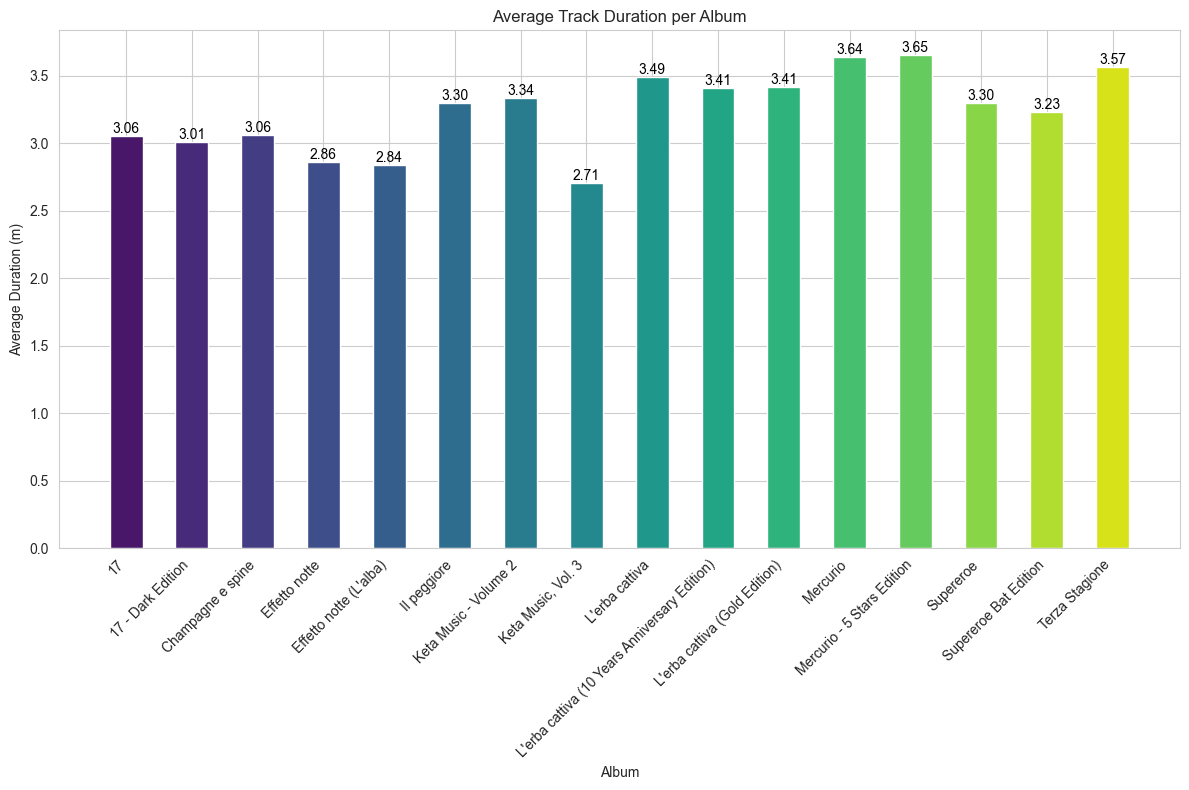

In [32]:
# Group by album and calculate the average duration
duration_per_album = discography_data_frame.groupby('Album')['Duration'].mean().reset_index()

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create a figure for the bar plot
plt.figure(figsize=(12, 8))
colors = sns.color_palette("viridis", len(duration_per_album))
barplot = plt.bar(duration_per_album['Album'], duration_per_album['Duration'], color=colors, width=0.5)

# Annotate each bar with the duration value
for bar, duration in zip(barplot, duration_per_album['Duration']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{duration:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Rotate x-axis labels and set labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel('Album')
plt.ylabel('Average Duration (m)')
plt.title('Average Track Duration per Album')

plt.tight_layout()
plt.show()

We start this section with an intriguing analysis: an artist's popularity does not necessarily follow the number of followers. The following graph highlights this non-obvious aspect by showing an interesting detail.

It is observed that artists with a higher level of popularity may have fewer followers compared to peers with significantly lower popularity. This scenario challenges common expectations and opens the door to a deeper reflection on the dynamics between an artist's popularity and their followers.

To ensure a comparable representation of values, it is essential to rescale the number of Followers on a 1:10K scale. Without such normalization, the values would become incomparable, compromising the validity of the comparison and making the graph less representative.

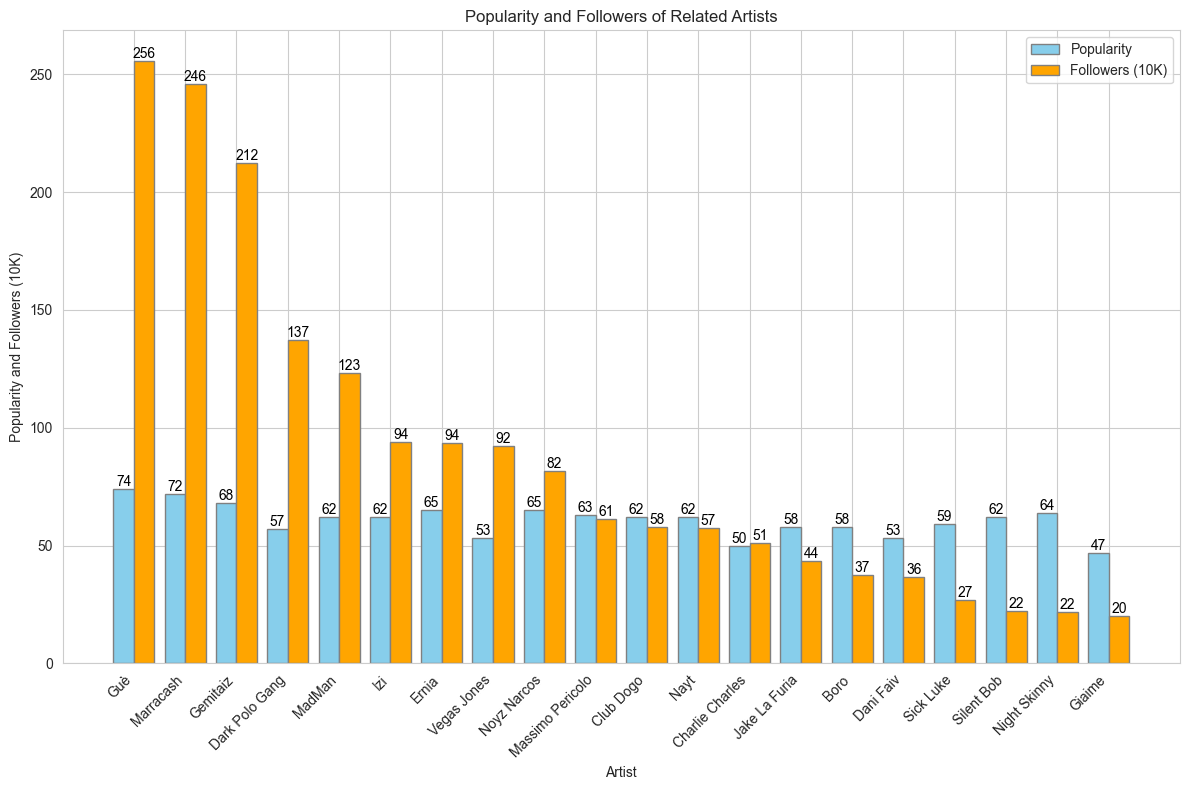

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Create a bar plot of popularity and number of followers for related artists
plt.figure(figsize=(12, 8))
bar_width = 0.4

# Bar positions on the x-axis
r1 = range(len(artists_data_frame))
r2 = [x + bar_width for x in r1]

# Bars for popularity
plt.bar(r1, artists_data_frame['Popularity'], color='skyblue', width=bar_width, edgecolor='grey', label='Popularity')

# Bars for number of followers
plt.bar(r2, artists_data_frame['Followers'] / 10000, color='orange', width=bar_width, edgecolor='grey', label='Followers (10K)')

# Labels with popularity values on each bar (truncated to whole numbers)
for i, popularity in enumerate(artists_data_frame['Popularity']):
    plt.text(i, int(popularity), f'{int(popularity)}', ha='center', va='bottom', fontsize=10, color='black')

# Labels with followers values on each bar (truncated to whole numbers and in 10K format)
for i, followers in enumerate(artists_data_frame['Followers']):
    plt.text(i + bar_width, followers / 10000, f'{followers / 10000:.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Customize the appearance of the plot
plt.xticks([r + bar_width / 2 for r in range(len(artists_data_frame))], artists_data_frame['Name'], rotation=45, ha='right')
plt.xlabel('Artist')
plt.ylabel('Values')  # Adjusted text to reflect the removal of normalization
plt.title('Popularity and Followers of Related Artists')
plt.legend()

# Add axis labels
plt.xlabel('Artist')
plt.ylabel('Popularity and Followers (10K)')

plt.tight_layout()
plt.show()

Starting from text files that list the names of artists for 10 different nationalities, we can create a DataFrame that groups artists by each nationality. Subsequently, we will add a column named "Nationality", which will be uniform for all artists within each DataFrame.

Once this phase is completed, we will proceed with concatenating all these DataFrames into a single DataFrame, thus gathering an international set of artists.
- Let’s start with Italian artists:

In [49]:
import pandas as pd
from tqdm import tqdm
import os

def process_artists_from_files(access_token, artists_directory):
    nationality_map = {
        'american.txt': 'American',
        'bulgarian.txt': 'Bulgarian',
        'chinese.txt': 'Chinese',
        'corean.txt': 'Korean',
        'french.txt': 'French',
        'german.txt': 'German',
        'italian.txt': 'Italian',
        'japanese.txt': 'Japanese',
        'romanian.txt': 'Romanian',
        'spanish.txt': 'Spanish'
    }
    
    all_artists_data = []
    
    # Iterate over all files in the artists directory
    for filename in os.listdir(artists_directory):
        if filename in nationality_map:
            file_path = os.path.join(artists_directory, filename)
            nationality = nationality_map[filename]
            
            with open(file_path, 'r') as file:
                artist_names = [line.strip() for line in file]
                
            # Process each artist
            for artist_name in tqdm(artist_names, desc=f'Processing {nationality} artists', unit='artist'):
                artist = search_artist(access_token, artist_name)
                
                artist_data = {
                    "Name": artist["name"],
                    "ID": artist["id"],
                    "Genre": artist["genres"][0] if artist["genres"] else None,
                    "Popularity": artist["popularity"],
                    "Followers": artist["followers"]["total"],
                    "Spotify URL": artist["external_urls"]["spotify"],
                    "Nationality": nationality
                }
                
                all_artists_data.append(artist_data)
    
    # Create a DataFrame for all artists
    artists_data_frame = pd.DataFrame(all_artists_data)
    artists_data_frame['Spotify URL'] = artists_data_frame['Spotify URL'].apply(make_clickable)
    
    return artists_data_frame

In [ ]:
artists_directory = 'artists'
all_artists_df = process_artists_from_files(access_token, artists_directory)

Now it is time to merge all 10 dataframes into a single global dataframe containing all the data obtained so far.
The dataframe contains the following columns:
- Name
- ID 
- Gender 
- Popularity
- Followers 
- Spotify URL 
- Nationality    

In [51]:
international_artists_data_frame = all_artists_df.copy()

print("Overall international artists DataFrame:")
display(HTML(international_artists_data_frame.to_html(escape=False)))

# Save the DataFrame to a CSV file
international_artists_data_frame.to_csv('international_artists_data.csv', index=False)

Overall international artists DataFrame:


,Name,ID,Genre,Popularity,Followers,Spotify URL,Nationality
0,Rammstein,6wWVKhxIU2cEi0K81v7HvP,german metal,80,10202981,https://open.spotify.com/artist/6wWVKhxIU2cEi0K81v7HvP,German
1,Kraftwerk,0dmPX6ovclgOy8WWJaFEUU,dusseldorf electronic,52,806005,https://open.spotify.com/artist/0dmPX6ovclgOy8WWJaFEUU,German
2,Scorpions,27T030eWyCQRmDyuvr1kxY,album rock,73,7344125,https://open.spotify.com/artist/27T030eWyCQRmDyuvr1kxY,German
3,Nena,561qBVd91ZPE9yCURXt7BB,portuguese pop,42,50269,https://open.spotify.com/artist/561qBVd91ZPE9yCURXt7BB,German
4,Falco,6sAF06LH8SXXo4AWnA9r02,None,2,58,https://open.spotify.com/artist/6sAF06LH8SXXo4AWnA9r02,German
5,Modern Talking,79bxUQsBIXO8nVLB9fYKf7,europop,72,1792806,https://open.spotify.com/artist/79bxUQsBIXO8nVLB9fYKf7,German
6,Tokio Hotel,46aNfN89JrOQTCy97GoCHa,german pop rock,63,1069681,https://open.spotify.com/artist/46aNfN89JrOQTCy97GoCHa,German
7,David Garrett,33k6kPYIS5TgseAc70LZjy,bow pop,52,495097,https://open.spotify.com/artist/33k6kPYIS5TgseAc70LZjy,German
8,Die Toten Hosen,2F8GvYuY0lfZNYu45dY6gJ,german alternative rock,62,1493480,https://open.spotify.com/artist/2F8GvYuY0lfZNYu45dY6gJ,German
9,Lene Marlin,5TrH0BhpRgs2gkOb992bGC,norwegian pop,46,74811,https://open.spotify.com/artist/5TrH0BhpRgs2gkOb992bGC,German


In [52]:
international_artists_data_frame.describe()

,Popularity,Followers
count,1000.000000,1.000000e+03
mean,50.824000,3.343251e+06
std,20.507159,1.124256e+07
min,0.000000,0.000000e+00
25%,41.000000,7.764300e+04
50%,53.000000,4.677995e+05
75%,63.000000,1.447750e+06
max,100.000000,1.205979e+08


- Having obtained a dataframe containing the nationality information of 1000 artists, we now proceed to the analysis of the popularity of each artist according to their country of origin. It is immediately evident that, holding the number of artists constant, those from the United States emerge as the most popular.

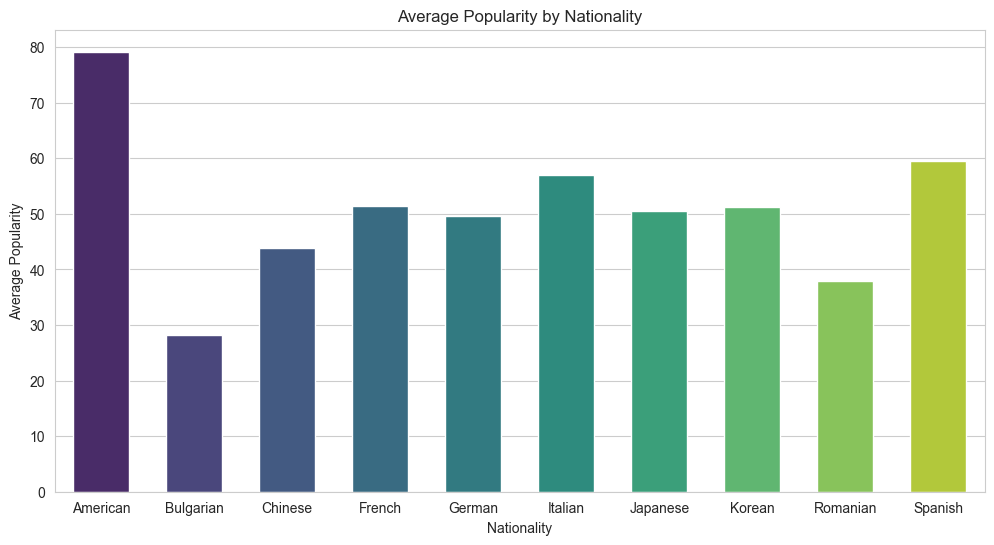

In [62]:
mean_data = international_artists_data_frame.groupby('Nationality').agg({'Popularity': 'mean', 'Followers': 'mean'}).reset_index()

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=mean_data, x='Nationality', y='Popularity', hue='Nationality', palette='viridis', width=0.6, legend=False)
plt.title('Average Popularity by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Average Popularity')

plt.show()

In the graph, it is clear that beyond a popularity score of 70, the increase in the number of followers should occur exponentially. <br> The exponential curve shows an <strong>inflection point</strong> around <strong>x=70</strong>, indicating a significant change in the relationship between popularity and followers within that range of values.

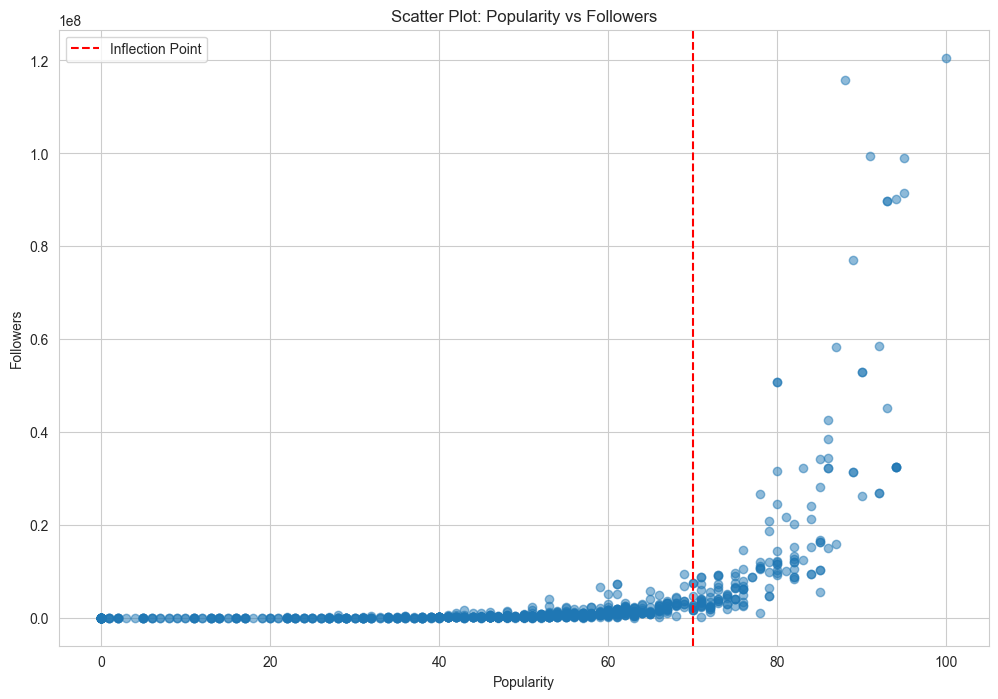

In [61]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
plt.scatter(international_artists_data_frame['Popularity'], international_artists_data_frame['Followers'], alpha=0.5)
plt.axvline(x=70, color='r', linestyle='--', label='Inflection Point')

plt.xlabel('Popularity')
plt.ylabel('Followers')
plt.title('Scatter Plot: Popularity vs Followers')
plt.legend()

plt.show()

For the sake of simplicity, we will continue our statistical analysis with a dataset retrieved from an external source **(GitHub**: @
jivanjotk)**

The dataset for this project contains a comprehensive list of the **most popular songs of 2023** listed on Spotify. The dataset offers a number of features beyond those typically available in similar datasets. It provides information on the attributes, popularity and presence of each song on various music platforms. 

Main characteristics of the dataset :
- **track_name**: name of the track
- **artist_name**: Name of the track's artist
- **artist_count**: Number of artists who contributed to the track
- **released_year**: Year the track was released
- **released_month**: Month in which the track was released
- **released_day**: Day of the month in which the track was released
- **in_spotify_playlists**: Number of Spotify playlists in which the track is included
- **in_spotify_charts**: Presence and position of the track on the Spotify charts
- **streams**: Total number of streams on Spotify
- **in_apple_playlists**: Number of Apple Music playlists the track is included in
- **in_apple_charts**: Presence and position of the song on Apple Music charts
- **in_deezer_playlists**: Number of Deezer playlists the track is included in
- **in_deezer_charts**: Presence and position of the track in Deezer's charts
- **in_shazam_charts**: Presence and position of the song in the Shazam charts
- **bpm**: Beats per minute, a measure of the track's tempo
- **key**: Key of the song
- **mode**: Mode of the song (major or minor)
- **danceability_%**: Percentage indicating how danceable the song is
- **valence_%**: Positivity of the song's musical content
- **energy_%**: Perceived energy level of the song
- **acousticness_%**: Amount of acoustic sounds in the song
- **instrumentalness_%**: Amount of instrumental content in the song
- **liveness_%**: Presence of live performance elements
- **speechiness_%**: Amount of spoken words

In [55]:
file_path = 'most_streamed.csv'
most_streamed_data_frame = pd.read_csv(file_path, encoding='latin1')

most_streamed_data_frame

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [56]:
most_streamed_data_frame.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


- The dataframe in question encompasses the most popular songs on Spotify during the entire year 2023, with no limitations related to musical genre or nationality of the artists. The main metric considered is the number of streams, which represents the plays of each song. This metric is analysed in relation to **danceability percentage**, a measure that quantifies how danceable a song is.

- As one might intuitively expect, there is an increase in the number of streams as the danceability percentage increases. This data leads to an important conclusion, showing that the popularity of a song is closely related to its ability to arouse the desire to dance in the audience of listeners.

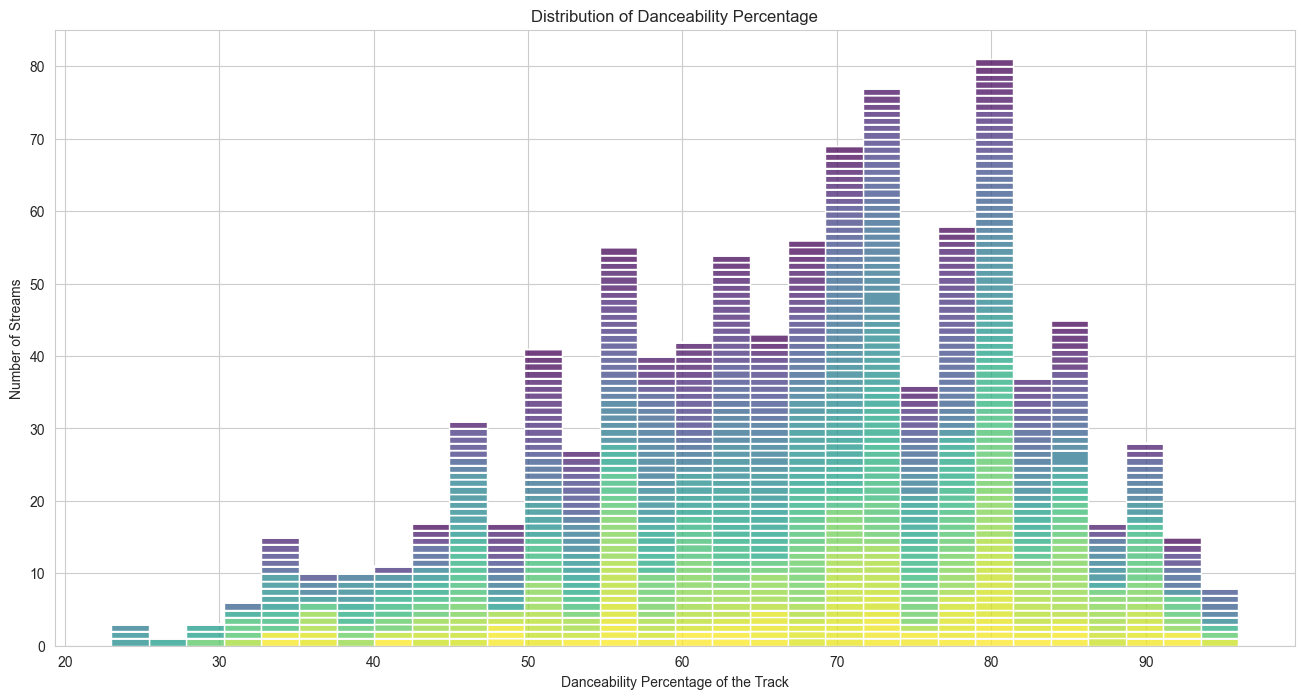

In [57]:
import warnings

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

plt.figure(figsize=(16, 8))
sns.histplot(data=most_streamed_data_frame, x='danceability_%', bins=30, hue='streams', multiple='stack', palette='viridis', legend=False)
plt.title('Distribution of Danceability Percentage')
plt.xlabel('Danceability Percentage of the Track')
plt.ylabel('Number of Streams')

plt.show()

Based on the analysis of the graph, it is clear that the distribution of the number of streams begins to decrease significantly after reaching a danceability level of 80%. This phenomenon indicates an interesting characteristic of music tracks, as they become overly specific and technical. Consequently, their attractiveness to the audience decreases, leading to a decrease in playability.

To support this hypothesis, let us now examine those pieces of music in which the danceability percentage exceeds 80%. This in-depth analysis will allow us to confirm whether there is indeed a negative correlation between increased danceability and decreased playback.

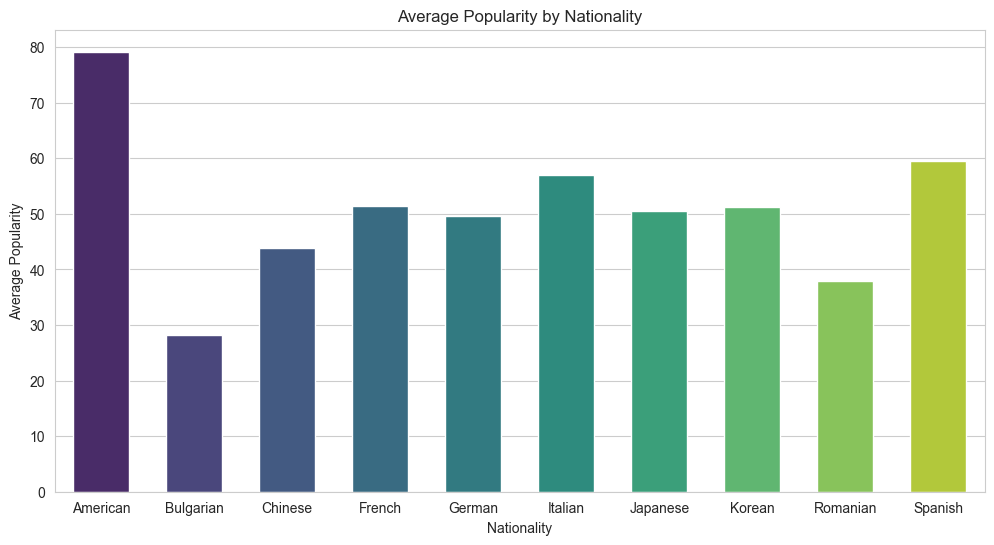

In [58]:
mean_data = international_artists_data_frame.groupby('Nationality').agg({'Popularity': 'mean', 'Followers': 'mean'}).reset_index()

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=mean_data, x='Nationality', y='Popularity', palette='viridis', width=0.6)
plt.title('Average Popularity by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Average Popularity')

plt.show()

In [59]:
most_streamed_data_frame[most_streamed_data_frame['danceability_%'] >= 80]

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33
18,Classy 101,"Feid, Young Miko",2,2023,3,31,2610,40,335222234,43,...,100,B,Major,86,67,66,14,0,12,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,On BS,"Drake, 21 Savage",2,2022,11,4,1338,0,170413877,9,...,158,A,Major,84,33,36,2,0,39,59
943,Privileged Rappers,"Drake, 21 Savage",2,2022,11,4,1007,0,112436403,6,...,144,F,Major,93,62,61,0,0,12,20
945,BackOutsideBoyz,Drake,1,2022,11,4,1045,0,93367537,8,...,142,F,Minor,85,40,43,4,0,39,32
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6


<section id="conclusion">
    <h2>8. Conclusion</h2>
</section>

In this tutorial, we explored the broad spectrum of possibilities offered by Spotify's Web API, opening the door to a world of creative interactions with the renowned music streaming service. Through the various steps of our journey, we learned how to retrieve content metadata, get personalized recommendations, create and manage playlists, and control the playback of tracks.

Access to Spotify's API not only provides developers with a powerful tool to enrich their applications with high-quality music data but also allows music fans to explore and utilize the wide range of features offered by the platform.

Covering the different stages of the tutorial, we provided detailed guidance on how to authenticate, use Spotify's RESTful API, and effectively integrate Spotify's Python API into the development process. The in-depth section on data extraction and analysis demonstrated how to translate the data obtained into meaningful and useful information.

In conclusion, Spotify's Web API stands as an indispensable resource for developers and music enthusiasts eager to exploit the full potential of Spotify's vast and diverse music world. I am confident that the experience gained in this tutorial will open up new creative perspectives and enable the creation of innovative and engaging music applications.